In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
sns.set()

In [2]:
# Load data
df_il_appr_rej = pd.read_csv('df_il_appr_rej.csv')

G:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (23,24,25,27,28,29,30,31,32,33,34,39,44,45) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
df_backup = df_il_appr_rej.copy()

In [4]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [5]:
df_il_appr_rej.head()

,Unnamed: 0,activity_year,lei,derived_msa-md,state_code,county_code,census_tract,conforming_loan_limit,derived_loan_product_type,derived_dwelling_category,derived_ethnicity,derived_race,derived_sex,action_taken,purchaser_type,preapproval,loan_type,loan_purpose,lien_status,reverse_mortgage,open-end_line_of_credit,business_or_commercial_purpose,loan_amount,loan_to_value_ratio,interest_rate,rate_spread,hoepa_status,total_loan_costs,total_points_and_fees,origination_charges,discount_points,lender_credits,loan_term,prepayment_penalty_term,intro_rate_period,negative_amortization,interest_only_payment,balloon_payment,other_nonamortizing_features,property_value,construction_method,occupancy_type,manufactured_home_secured_property_type,manufactured_home_land_property_interest,total_units,multifamily_affordable_units,income,debt_to_income_ratio,applicant_credit_score_type,co-applicant_credit_score_type,applicant_ethnicity-1,applicant_ethnicity-2,applicant_ethnicity-3,applicant_ethnicity-4,applicant_ethnicity-5,co-applicant_ethnicity-1,co-applicant_ethnicity-2,co-applicant_ethnicity-3,co-applicant_ethnicity-4,co-applicant_ethnicity-5,applicant_ethnicity_observed,co-applicant_ethnicity_observed,applicant_race-1,applicant_race-2,applicant_race-3,applicant_race-4,applicant_race-5,co-applicant_race-1,co-applicant_race-2,co-applicant_race-3,co-applicant_race-4,co-applicant_race-5,applicant_race_observed,co-applicant_race_observed,applicant_sex,co-applicant_sex,applicant_sex_observed,co-applicant_sex_observed,applicant_age,co-applicant_age,applicant_age_above_62,co-applicant_age_above_62,submission_of_application,initially_payable_to_institution,aus-1,aus-2,aus-3,aus-4,aus-5,denial_reason-1,denial_reason-2,denial_reason-3,denial_reason-4,tract_population,tract_minority_population_percent,ffiec_msa_md_median_family_income,tract_to_msa_income_percentage,tract_owner_occupied_units,tract_one_to_four_family_homes,tract_median_age_of_housing_units,approve_status
0,0,2020,MV4O55SH8HO6KQSGW013,16984,IL,17043.0,1.704384e+10,C,Conventional:Subordinate Lien,Single Family (1-4 Units):Site-Built,Ethnicity Not Available,Race Not Available,Sex Not Available,3,0,2,1,31,2,2,1,2,55000.0,85.0,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,300.0,36.0,1.0,2,1,2,2,245000.0,1,1,3,5,1,NaN,49.0,50%-60%,1,9,3.0,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,2,2,6.0,NaN,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN,2,2,3,3,2,2,55-64,25-34,Yes,No,1,1,6,NaN,NaN,NaN,NaN,1,2.0,NaN,NaN,6129,22.66,84800,113,2191,2066,36,0.0
1,1,2020,MV4O55SH8HO6KQSGW013,28100,IL,17091.0,1.709101e+10,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,White,Female,1,0,2,1,31,1,2,2,2,25000.0,23.478,4.19,1.78,2,0.0,NaN,0.0,NaN,NaN,240.0,NaN,NaN,2,2,2,2,115000.0,1,1,3,5,1,NaN,15.0,39,1,10,2.0,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,2,4,5.0,NaN,NaN,NaN,NaN,8.0,NaN,NaN,NaN,NaN,2,4,2,5,2,4,65-74,9999,Yes,NaN,1,1,6,NaN,NaN,NaN,NaN,10,NaN,NaN,NaN,1812,59.16,76500,50,340,498,48,1.0
2,2,2020,MV4O55SH8HO6KQSGW013,16984,IL,17043.0,1.704384e+10,C,Conventional:Subordinate Lien,Single Family (1-4 Units):Site-Built,Ethnicity Not Available,Race Not Available,Sex Not Available,1,0,2,1,1,2,2,1,2,115000.0,85.0,4.0,1.12,2,NaN,NaN,NaN,NaN,NaN,300.0,36.0,1.0,2,1,2,2,735000.0,1,1,3,5,1,NaN,111.0,50%-60%,1,10,3.0,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,2,4,6.0,NaN,NaN,NaN,NaN,8.0,NaN,NaN,NaN,NaN,2,4,3,5,2,4,25-34,9999,No,NaN,1,1,6,NaN,NaN,NaN,NaN,10,NaN,NaN,NaN,4668,43.12,84800,169,1159,1524,33,1.0
3,3,2020,MV4O55SH8HO6KQSGW013,16984,IL,17031.0,1.703181e+10,C,Conventional:Subordinate Lien,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,White,Male,1,0,2,1,2,2,2,1,2,115000.0,84.876,3.0,0.13,2,NaN,NaN,NaN,NaN,NaN,300.0,36.0,1.0,2,1,2,2,385000.0,1,1,3,5,1,NaN,250.0,20%-<30%,1,10,2.0,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,2,4,5.0,NaN,NaN,NaN,NaN,8.0,NaN,NaN,NaN,NaN,2,4,1,5,2,4,35-44,9999,No,NaN,1,1,6,NaN,NaN,NaN,NaN,10,NaN,NaN,NaN,5137,17.73,84800,105,1575,1800,58,1.0
4,4,2020,MV4O55SH8HO6KQSGW013,16984,IL,17031.0,1.703181e+10,C,

In [6]:
df_il_appr_rej.describe()

,Unnamed: 0,activity_year,derived_msa-md,county_code,census_tract,action_taken,purchaser_type,preapproval,loan_type,loan_purpose,lien_status,reverse_mortgage,open-end_line_of_credit,business_or_commercial_purpose,loan_amount,hoepa_status,negative_amortization,interest_only_payment,balloon_payment,other_nonamortizing_features,construction_method,occupancy_type,manufactured_home_secured_property_type,manufactured_home_land_property_interest,income,applicant_credit_score_type,co-applicant_credit_score_type,applicant_ethnicity-1,applicant_ethnicity-2,applicant_ethnicity-3,applicant_ethnicity-4,applicant_ethnicity-5,co-applicant_ethnicity-1,co-applicant_ethnicity-2,co-applicant_ethnicity-3,co-applicant_ethnicity-4,co-applicant_ethnicity-5,applicant_ethnicity_observed,co-applicant_ethnicity_observed,applicant_race-1,applicant_race-2,applicant_race-3,applicant_race-4,applicant_race-5,co-applicant_race-1,co-applicant_race-2,co-applicant_race-3,co-applicant_race-4,co-applicant_race-5,applicant_race_observed,co-applicant_race_observed,applicant_sex,co-applicant_sex,applicant_sex_observed,co-applicant_sex_observed,submission_of_application,initially_payable_to_institution,aus-1,aus-2,aus-3,aus-4,aus-5,denial_reason-1,denial_reason-2,denial_reason-3,denial_reason-4,tract_population,tract_minority_population_percent,ffiec_msa_md_median_family_income,tract_to_msa_income_percentage,tract_owner_occupied_units,tract_one_to_four_family_homes,tract_median_age_of_housing_units,approve_status
count,7.507000e+05,750700.0,750700.000000,748042.000000,7.479010e+05,750700.000000,750700.000000,750700.000000,750700.000000,750700.000000,750700.000000,750700.000000,750700.000000,750700.000000,7.507000e+05,750700.000000,750700.000000,750700.000000,750700.000000,750700.000000,750700.00000,750700.000000,750700.000000,750700.000000,6.413510e+05,750700.000000,750700.000000,750579.000000,35954.000000,842.000000,14.000000,3.0,750657.000000,11694.000000,269.000000,3.000000,0.0,750700.000000,750700.000000,750666.000000,32249.000000,1866.000000,110.000000,28.000000,750684.000000,12152.000000,676.000000,35.000000,8.000000,750700.000000,750700.000000,750700.000000,750700.000000,750700.000000,750700.000000,750700.000000,750700.000000,750700.000000,53310.000000,10552.000000,1782.000000,1421.000000,750700.000000,13580.000000,1901.000000,155.000000,750700.000000,750700.000000,750700.000000,750700.000000,750700.000000,750700.000000,750700.000000,750700.000000
mean,1.911748e+06,2020.0,26212.154692,17080.193045,1.708086e+10,2.125988,4.956249,1.987524,1.261648,19.226795,1.051126,59.098956,59.061884,58.936478,2.416829e+05,2.240039,59.058607,59.024091,59.046848,59.054845,1.00783,1.101833,60.036036,61.922816,2.365205e+02,61.251897,65.197139,2.289906,11.291929,12.317102,13.428571,14.0,3.759432,11.273474,11.921933,13.333333,NaN,2.157699,3.136671,5.162223,20.276319,21.513398,24.872727,22.928571,6.728049,20.498601,21.828402,25.085714,37.250000,2.157321,3.137177,1.674273,3.637549,2.156406,3.136064,58.475892,58.451666,60.082546,3.077734,3.429208,1.450056,1.444757,49.873342,4.502430,5.559179,6.496774,5526.849064,29.792738,84214.665246,122.409853,1509.633025,1775.846327,42.832258,0.882158
std,1.184564e+06,0.0,20536.542858,58.909116,6.515986e+07,1.840694,14.825914,0.110999,0.587039,14.582036,0.220254,245.079243,245.121403,244.806097,5.470129e+05,0.427786,244.995036,245.003142,244.997798,244.995920,0.08814,0.429441,244.854264,244.414778,4.864746e+03,244.425442,243.498866,1.120707,1.752810,1.944025,0.755929,0.0,1.513572,1.776136,2.540244,0.577350,NaN,0.412367,0.943550,2.051407,6.851960,9.175798,12.711412,14.911911,1.897899,6.542027,7.840077,11.773278,8.908263,0.412237,0.943607,0.964045,1.547316,0.413403,0.944181,245.135096,245.140793,244.859513,1.704468,1.648104,0.751213,0.746312,207.563706,2.683448,2.666418,2.328185,3184.950621,24.481989,9572.753600,46.340653,943.625793,1048.388645,19.320694,0.322421
min,0.000000e+00,2020.0,0.000000,17001.000000,1.700100e+10,1.000000,0.000000,1.000000,1.0

In [7]:
df_il_appr_rej.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750700 entries, 0 to 750699
Data columns (total 101 columns):
 #   Column                                    Dtype  
---  ------                                    -----  
 0   Unnamed: 0                                int64  
 1   activity_year                             int64  
 2   lei                                       object 
 3   derived_msa-md                            int64  
 4   state_code                                object 
 5   county_code                               float64
 6   census_tract                              float64
 7   conforming_loan_limit                     object 
 8   derived_loan_product_type                 object 
 9   derived_dwelling_category                 object 
 10  derived_ethnicity                         object 
 11  derived_race                              object 
 12  derived_sex                               object 
 13  action_taken                              int64  
 14  pur

In [8]:
# All Variables
all_vars = df_il_appr_rej.columns.tolist()[7:-1]

# Numerical Variables
num_vars = all_vars[15:28]
add_num_vars_1 = ['property_value', 'income', 'multifamily_affordable_units']
add_num_vars_2 = all_vars[-7:]
num_vars += add_num_vars_1
num_vars += add_num_vars_2
num_vars.remove('hoepa_status')

# Categorical Variables
cat_vars = [var for var in all_vars if var not in num_vars]

In [9]:
num_vars

['loan_amount',
 'loan_to_value_ratio',
 'interest_rate',
 'rate_spread',
 'total_loan_costs',
 'total_points_and_fees',
 'origination_charges',
 'discount_points',
 'lender_credits',
 'loan_term',
 'prepayment_penalty_term',
 'intro_rate_period',
 'property_value',
 'income',
 'multifamily_affordable_units',
 'tract_population',
 'tract_minority_population_percent',
 'ffiec_msa_md_median_family_income',
 'tract_to_msa_income_percentage',
 'tract_owner_occupied_units',
 'tract_one_to_four_family_homes',
 'tract_median_age_of_housing_units']

In [10]:
# Process Exempt in numerical variables -> replace with nan
for var in num_vars:
    df_il_appr_rej[var] = df_il_appr_rej[var].replace('Exempt', np.nan)
    df_il_appr_rej[var] = df_il_appr_rej[var].astype('float64')

In [11]:
df_il_appr_rej[num_vars].describe()

,loan_amount,loan_to_value_ratio,interest_rate,rate_spread,total_loan_costs,total_points_and_fees,origination_charges,discount_points,lender_credits,loan_term,prepayment_penalty_term,intro_rate_period,property_value,income,multifamily_affordable_units,tract_population,tract_minority_population_percent,ffiec_msa_md_median_family_income,tract_to_msa_income_percentage,tract_owner_occupied_units,tract_one_to_four_family_homes,tract_median_age_of_housing_units
count,7.507000e+05,5.426330e+05,589081.000000,465310.000000,5.180810e+05,2180.000000,519270.000000,128545.000000,234732.000000,708277.000000,11612.000000,57088.000000,6.486240e+05,6.413510e+05,1584.000000,750700.000000,750700.000000,750700.000000,750700.000000,750700.000000,750700.000000,750700.000000
mean,2.416829e+05,7.827403e+01,3.297281,0.324838,4.023467e+03,2096.914450,1467.493888,1613.132443,1207.824024,311.549164,32.744230,34.857220,3.590537e+05,2.365205e+02,4.679924,5526.849064,29.792738,84214.665246,122.409853,1509.633025,1775.846327,42.832258
std,5.470129e+05,1.366042e+03,4.467435,5.704986,1.446074e+05,2226.412253,1440.654540,1804.610292,2764.983625,83.310474,5.489448,49.912358,9.010955e+05,4.864746e+03,20.001243,3184.950621,24.481989,9572.753600,46.340653,943.625793,1048.388645,19.320694
min,5.000000e+03,1.200000e-02,0.000000,-3480.000000,0.000000e+00,0.000000,0.000000,0.002000,0.010000,1.000000,0.000000,1.000000,5.000000e+03,-2.578500e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.250000e+05,6.666700e+01,2.775000,-0.081000,1.935320e+03,648.750000,770.000000,398.410000,175.000000,240.000000,24.000000,1.000000,1.850000e+05,6.200000e+01,0.000000,3736.000000,11.790000,84800.000000,93.000000,968.000000,1201.000000,28.000000
50%,2.050000e+05,7.894700e+01,3.125000,0.181150,2.717500e+03,1167.500000,1272.670000,1026.000000,611.170000,360.000000,36.000000,3.000000,2.750000e+05,9.700000e+01,0.000000,4888.000000,22.750000,84800.000000,117.000000,1342.000000,1612.000000,41.000000
75%,2.950000e+05,9.000000e+01,3.500000,0.580000,5.003000e+03,3025.957500,1582.055000,2230.430000,1750.000000,360.000000,36.000000,63.000000,4.150000e+05,1.500000e+02,0.000000,6353.000000,40.690000,84800.000000,145.000000,1807.000000,2099.000000,58.000000
max,1.656050e+08,1.000100e+06,900.000000,418.000000,9.895491e+07,18140.600000,74076.000000,47318.050000,464258.090000,3660.000000,36.000000,1111.000000,2.117250e+08,1.982668e+06,100.000000,27626.000000,100.000000,103400.000000,333.000000,7369.000000,8696.000000,76.000000


## Data Preprocessing

In [12]:
df_il_appr_rej['applicant_ethnicity-1'].unique()

array([ 3.,  2.,  1., 13., 11.,  4., 12., 14., nan])

In [13]:
# Categorical variables
df_il_appr_rej[cat_vars].isna().sum()

conforming_loan_limit                         3232
derived_loan_product_type                        0
derived_dwelling_category                        0
derived_ethnicity                                0
derived_race                                     0
derived_sex                                      0
action_taken                                     0
purchaser_type                                   0
preapproval                                      0
loan_type                                        0
loan_purpose                                     0
lien_status                                      0
reverse_mortgage                                 0
open-end_line_of_credit                          0
business_or_commercial_purpose                   0
hoepa_status                                     0
negative_amortization                            0
interest_only_payment                            0
balloon_payment                                  0
other_nonamortizing_features   

In [14]:
# Fill Missing Values with NA or relevant value
df_il_appr_rej['conforming_loan_limit'].fillna('NA', inplace=True)
df_il_appr_rej['debt_to_income_ratio'].fillna('NA', inplace=True)
df_il_appr_rej['applicant_ethnicity-1'].fillna(4, inplace=True)
df_il_appr_rej['co-applicant_ethnicity-1'].fillna(4, inplace=True)
df_il_appr_rej['applicant_race-1'].fillna(7, inplace=True)
df_il_appr_rej['co-applicant_race-1'].fillna(7, inplace=True)

In [15]:
vars_remove = ['denial_reason-1', 'denial_reason-2', 'denial_reason-3', 'denial_reason-4',
              'applicant_age_above_62', 'co-applicant_age_above_62', 'action_taken', 
               'purchaser_type', 'hoepa_status',
              'applicant_ethnicity-1', 'co-applicant_ethnicity-1', 'applicant_ethnicity_observed',
              'co-applicant_ethnicity_observed', 'applicant_race-1', 'co-applicant_race-1',
              'applicant_race_observed', 'co-applicant_race_observed', 'applicant_sex',
              'co-applicant_sex', 'applicant_sex_observed', 'co-applicant_sex_observed']
vars_pattern = ['applicant_ethnicity-', 'co-applicant_ethnicity-', 'applicant_race-',
               'co-applicant_race-', 'aus-']
for pat in vars_pattern:
    for i in range(2,6):
        var = f'{pat}{i}'
        vars_remove.append(var)


In [16]:
# Numerical variables
df_num_isnull = df_il_appr_rej[num_vars].isna().sum()
df_num_isnull

loan_amount                               0
loan_to_value_ratio                  208067
interest_rate                        161619
rate_spread                          285390
total_loan_costs                     232619
total_points_and_fees                748520
origination_charges                  231430
discount_points                      622155
lender_credits                       515968
loan_term                             42423
prepayment_penalty_term              739088
intro_rate_period                    693612
property_value                       102076
income                               109349
multifamily_affordable_units         749116
tract_population                          0
tract_minority_population_percent         0
ffiec_msa_md_median_family_income         0
tract_to_msa_income_percentage            0
tract_owner_occupied_units                0
tract_one_to_four_family_homes            0
tract_median_age_of_housing_units         0
dtype: int64

In [17]:
num_vars_tofill = df_num_isnull.index[df_num_isnull!=0].tolist()
for var in num_vars_tofill:
    med = df_il_appr_rej[var].median()
    df_il_appr_rej[var].fillna(med, inplace=True)

In [18]:
remian_vars = [var for var in all_vars if var not in vars_remove]
df_il_appr_rej[remian_vars].isna().sum()

conforming_loan_limit                       0
derived_loan_product_type                   0
derived_dwelling_category                   0
derived_ethnicity                           0
derived_race                                0
derived_sex                                 0
preapproval                                 0
loan_type                                   0
loan_purpose                                0
lien_status                                 0
reverse_mortgage                            0
open-end_line_of_credit                     0
business_or_commercial_purpose              0
loan_amount                                 0
loan_to_value_ratio                         0
interest_rate                               0
rate_spread                                 0
total_loan_costs                            0
total_points_and_fees                       0
origination_charges                         0
discount_points                             0
lender_credits                    

In [19]:
# Process total_units
df_il_appr_rej['total_units'].unique()

array(['1', '2', '4', '3', '5-24', '25-49', 1, 2, 4, 3, '50-99', '>149',
       '100-149'], dtype=object)

In [20]:
def num_to_str(val):
    num_lst = [1,2,3,4]
    if val in num_lst:
        return str(val)
    else:
        return val

df_il_appr_rej['total_units'] = df_il_appr_rej['total_units'].apply(num_to_str)

## Dummies for categorical

In [21]:
cat_vars_remain = [var for var in cat_vars if var in remian_vars]
cat_vars_remain

['conforming_loan_limit',
 'derived_loan_product_type',
 'derived_dwelling_category',
 'derived_ethnicity',
 'derived_race',
 'derived_sex',
 'preapproval',
 'loan_type',
 'loan_purpose',
 'lien_status',
 'reverse_mortgage',
 'open-end_line_of_credit',
 'business_or_commercial_purpose',
 'negative_amortization',
 'interest_only_payment',
 'balloon_payment',
 'other_nonamortizing_features',
 'construction_method',
 'occupancy_type',
 'manufactured_home_secured_property_type',
 'manufactured_home_land_property_interest',
 'total_units',
 'debt_to_income_ratio',
 'applicant_credit_score_type',
 'co-applicant_credit_score_type',
 'applicant_age',
 'co-applicant_age',
 'submission_of_application',
 'initially_payable_to_institution',
 'aus-1']

In [22]:
cat_dummies = [pd.get_dummies(df_il_appr_rej[var], prefix = var, prefix_sep = ':') for var in cat_vars_remain]

In [23]:
df_cat_dummies = pd.concat(cat_dummies, axis = 1)

In [24]:
pd.options.display.max_columns = 30
df_cat_dummies.head()

,conforming_loan_limit:C,conforming_loan_limit:NA,conforming_loan_limit:NC,derived_loan_product_type:Conventional:First Lien,derived_loan_product_type:Conventional:Subordinate Lien,derived_loan_product_type:FHA:First Lien,derived_loan_product_type:FHA:Subordinate Lien,derived_loan_product_type:FSA/RHS:First Lien,derived_loan_product_type:FSA/RHS:Subordinate Lien,derived_loan_product_type:VA:First Lien,derived_loan_product_type:VA:Subordinate Lien,derived_dwelling_category:Multifamily:Manufactured,derived_dwelling_category:Multifamily:Site-Built,derived_dwelling_category:Single Family (1-4 Units):Manufactured,derived_dwelling_category:Single Family (1-4 Units):Site-Built,...,submission_of_application:1,submission_of_application:2,submission_of_application:3,submission_of_application:1111,initially_payable_to_institution:1,initially_payable_to_institution:2,initially_payable_to_institution:3,initially_payable_to_institution:1111,aus-1:1,aus-1:2,aus-1:3,aus-1:4,aus-1:5,aus-1:6,aus-1:1111
0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,...,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0
1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,...,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0
2,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,...,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0
3,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,...,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0
4,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,...,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0


In [25]:
# Concat with original dataset
df_il_cat_dummies = pd.concat([df_il_appr_rej, df_cat_dummies], axis = 1)
df_il_cat_dummies.columns.values

array(['Unnamed: 0', 'activity_year', 'lei', 'derived_msa-md',
       'state_code', 'county_code', 'census_tract',
       'conforming_loan_limit', 'derived_loan_product_type',
       'derived_dwelling_category', 'derived_ethnicity', 'derived_race',
       'derived_sex', 'action_taken', 'purchaser_type', 'preapproval',
       'loan_type', 'loan_purpose', 'lien_status', 'reverse_mortgage',
       'open-end_line_of_credit', 'business_or_commercial_purpose',
       'loan_amount', 'loan_to_value_ratio', 'interest_rate',
       'rate_spread', 'hoepa_status', 'total_loan_costs',
       'total_points_and_fees', 'origination_charges', 'discount_points',
       'lender_credits', 'loan_term', 'prepayment_penalty_term',
       'intro_rate_period', 'negative_amortization',
       'interest_only_payment', 'balloon_payment',
       'other_nonamortizing_features', 'property_value',
       'construction_method', 'occupancy_type',
       'manufactured_home_secured_property_type',
       'manufactured_ho

### Split dataset for train and test

In [26]:
df_data_inputs_train, df_data_inputs_test, \
df_data_targets_train, df_data_targets_test = \
train_test_split(df_il_cat_dummies.drop('approve_status', axis = 1), \
                 df_il_cat_dummies['approve_status'], test_size = 0.2, random_state = 42)

In [27]:
df_data_inputs_train.shape

(600560, 266)

In [28]:
df_data_targets_train.shape

(600560,)

In [29]:
df_data_inputs_test.shape

(150140, 266)

In [30]:
df_data_targets_test.shape

(150140,)

### Calculate WoE and IV

In [153]:
# df_vars = df_data_inputs_train
# df_targets = df_data_targets_train

df_vars = df_data_inputs_test
df_targets = df_data_targets_test

In [154]:
pd.options.display.max_rows = 30

In [155]:
# WoE function for discrete unordered variables
def woe_discrete(df, discrete_variabe_name, good_bad_variable_df):
    df = pd.concat([df[discrete_variabe_name], good_bad_variable_df], axis = 1)
    # Only store the independent and dependent variables
    
    df = pd.concat([df.groupby(df.columns.values[0], 
                               as_index = False)[df.columns.values[1]].count(),
                    df.groupby(df.columns.values[0], 
                               as_index = False)[df.columns.values[1]].mean()], 
                   axis = 1)
    # Group the df by value in first column
    # Add the number and mean of good_bad obs of each kind
    
    df = df.iloc[:, [0, 1, 3]]
    # Remove the 3rd column
    
    df.columns = [df.columns.values[0], 'n_obs', 'prop_good']
    # Rename the columns
    
    df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum()
    # Calculate proportions of each kind
    
    df['n_good'] = df['prop_good'] * df['n_obs']
    df['n_bad'] = (1 - df['prop_good']) * df['n_obs']
     # Calculate the number of good and bad borrowers of each kind
        
    df['prop_n_good'] = df['n_good'] / df['n_good'].sum()
    df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum()
    # Calculate the proportions of good and bad borrowers of each kind
    
    df['WoE'] = np.log(df['prop_n_good'] / df['prop_n_bad'])
    # Calculate the weight of evidence of each kind
    df = df.sort_values(['WoE'])
    df = df.reset_index(drop = True)
    # Sort the dataframes by WoE, and replace the index with increasing numbers
    
    df['diff_prop_good'] = df['prop_good'].diff().abs()
    df['diff_WoE'] = df['WoE'].diff().abs()
    # Calculate the difference of certain variable between the nearby kinds
    
    df['IV'] = (df['prop_n_good'] - df['prop_n_bad']) * df['WoE']
    df['IV'] = df['IV'].sum()
    #Calculatet he information value of each kind
    
    return df


def plot_by_woe(df_WoE, rotation_of_x_axis_labels = 0):
    x = np.array(df_WoE.iloc[:, 0].apply(str))
    # Turns the values of the first column to strings, 
    #   makes an array from these strings, and passes it to variable x
    y = df_WoE['WoE']
    # Selects a column with label 'WoE' and passes it to variable y
    plt.figure(figsize=(18, 6))
    # Sets the graph size to width 18 x height 6.
    plt.plot(x, y, marker = 'o', linestyle = '--', color = 'k')
    # Plots the datapoints with coordiantes variable x on the x-axis 
    #  and variable y on the y-axis
    # Sets the marker for each datapoint to a circle, 
    #  the style line between the points to dashed, and the color to black
    plt.xlabel(df_WoE.columns[0])
    # Names the x-axis with the name of the first column
    plt.ylabel('Weight of Evidence')
    # Names the y-axis 'Weight of Evidence'.
    plt.title(str('Weight of Evidence by ' + df_WoE.columns[0]))
    # Names the grapth 'Weight of Evidence by ' the name of the column with index 0.
    plt.xticks(rotation = rotation_of_x_axis_labels)
    # Rotates the labels of the x-axis a predefined number of degrees
    plt.show()

In [156]:
# conforming_loan_limit
df_temp = woe_discrete(df_vars, 'conforming_loan_limit', df_targets)
df_temp

,conforming_loan_limit,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,C,144269,0.882144,0.960896,127266.0,17003.0,0.960360,0.964928,-0.004745,NaN,NaN,0.001542
1,NC,5233,0.889929,0.034854,4657.0,576.0,0.035142,0.032688,0.072384,0.007786,0.077129,0.001542
2,NA,638,0.934169,0.004249,596.0,42.0,0.004497,0.002384,0.634936,0.044240,0.562552,0.001542


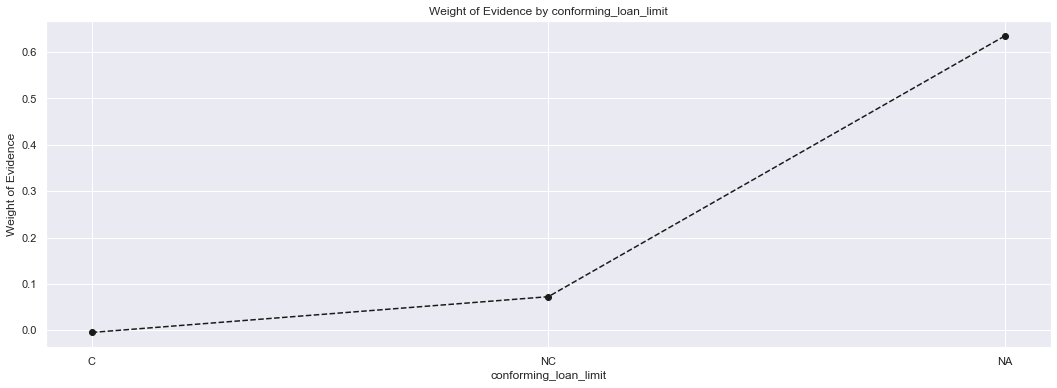

In [157]:
plot_by_woe(df_temp)

In [158]:
# derived_loan_product_type
df_temp = woe_discrete(df_vars, 'derived_loan_product_type', df_targets)
df_temp

,derived_loan_product_type,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,Conventional:Subordinate Lien,7659,0.608435,0.051012,4660.0,2999.0,0.035165,0.170195,-1.576898,NaN,NaN,0.234679
1,FHA:Subordinate Lien,39,0.641026,0.000260,25.0,14.0,0.000189,0.000795,-1.437816,0.032591,0.139082,0.234679
2,FHA:First Lien,19998,0.893289,0.133196,17864.0,2134.0,0.134803,0.121105,0.107155,0.252264,1.544971,0.234679
3,VA:First Lien,7970,0.896989,0.053084,7149.0,821.0,0.053947,0.046592,0.146570,0.003699,0.039415,0.234679
4,Conventional:First Lien,113376,0.898188,0.755135,101833.0,11543.0,0.768441,0.655071,0.159620,0.001200,0.013050,0.234679
5,FSA/RHS:First Lien,1082,0.899261,0.007207,973.0,109.0,0.007342,0.006186,0.171402,0.001072,0.011781,0.234679
6,VA:Subordinate Lien,16,0.937500,0.000107,15.0,1.0,0.000113,0.000057,0.690416,0.038239,0.519014,0.234679


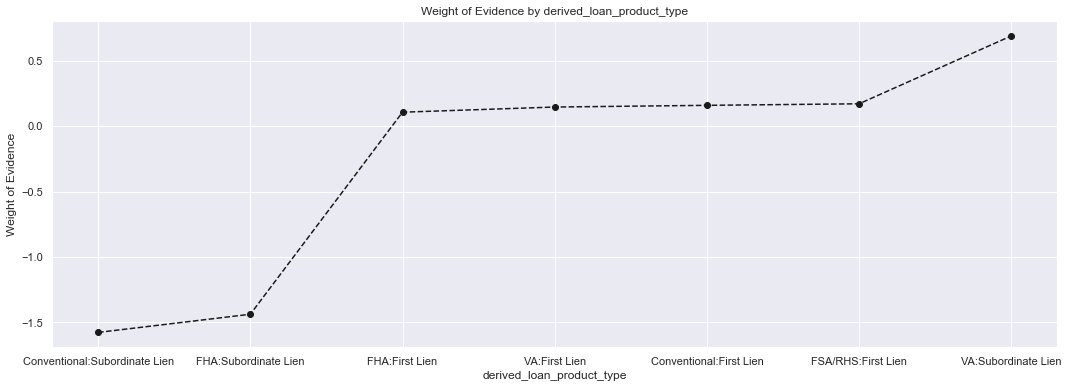

In [159]:
plot_by_woe(df_temp)

In [160]:
df_vars['derived_loan_product_type:CS_FHAS_FSARHSS'] = \
sum([df_vars['derived_loan_product_type:Conventional:Subordinate Lien'],
     df_vars['derived_loan_product_type:FHA:Subordinate Lien'],
     df_vars['derived_loan_product_type:FSA/RHS:Subordinate Lien']])

df_vars['derived_loan_product_type:CF_FSARHSF'] = \
sum([df_vars['derived_loan_product_type:Conventional:First Lien'],
     df_vars['derived_loan_product_type:FSA/RHS:First Lien']])

In [161]:
# derived_dwelling_category
df_temp = woe_discrete(df_vars, 'derived_dwelling_category', df_targets)
df_temp

,derived_dwelling_category,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,Single Family (1-4 Units):Manufactured,1198,0.578464,0.007979,693.0,505.0,0.005229,0.028659,-1.701163,NaN,NaN,inf
1,Single Family (1-4 Units):Site-Built,148304,0.884872,0.987771,131230.0,17074.0,0.990273,0.968957,0.021760,0.306408,1.722923,inf
2,Multifamily:Site-Built,632,0.933544,0.004209,590.0,42.0,0.004452,0.002384,0.624818,0.048673,0.603058,inf
3,Multifamily:Manufactured,6,1.000000,0.000040,6.0,0.0,0.000045,0.000000,inf,0.066456,inf,inf


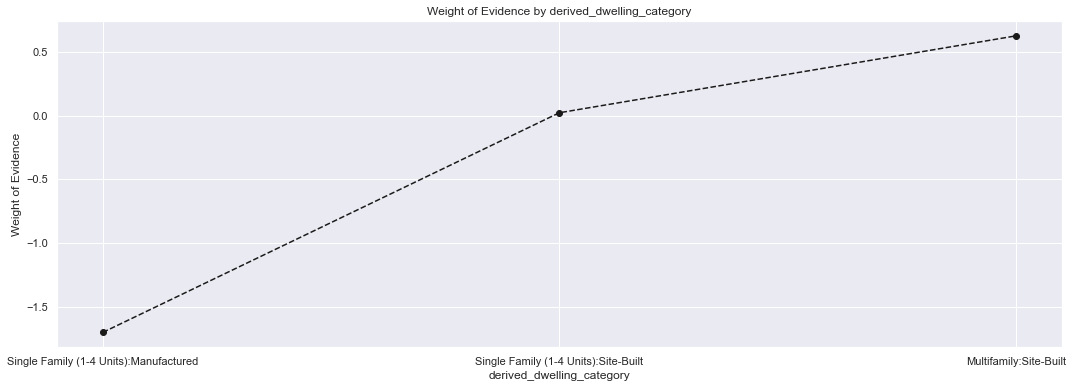

In [162]:
plot_by_woe(df_temp)

In [163]:
df_vars['derived_dwelling_category:multifamily'] = \
sum([df_vars['derived_dwelling_category:Multifamily:Manufactured'],
     df_vars['derived_dwelling_category:Multifamily:Site-Built']])

In [164]:
# derived_ethnicity
df_temp = woe_discrete(df_vars, 'derived_ethnicity', df_targets)
df_temp

,derived_ethnicity,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,Free Form Text Only,21,0.714286,0.000140,15.0,6.0,0.000113,0.000341,-1.101344,NaN,NaN,0.047378
1,Hispanic or Latino,12669,0.810561,0.084381,10269.0,2400.0,0.077491,0.136201,-0.563974,0.096275,0.537370,0.047378
2,Joint,2657,0.881069,0.017697,2341.0,316.0,0.017665,0.017933,-0.015043,0.070508,0.548930,0.047378
3,Not Hispanic or Latino,104020,0.883917,0.692820,91945.0,12075.0,0.693825,0.685262,0.012419,0.002848,0.027462,0.047378
4,Ethnicity Not Available,30773,0.908231,0.204962,27949.0,2824.0,0.210906,0.160263,0.274592,0.024315,0.262174,0.047378


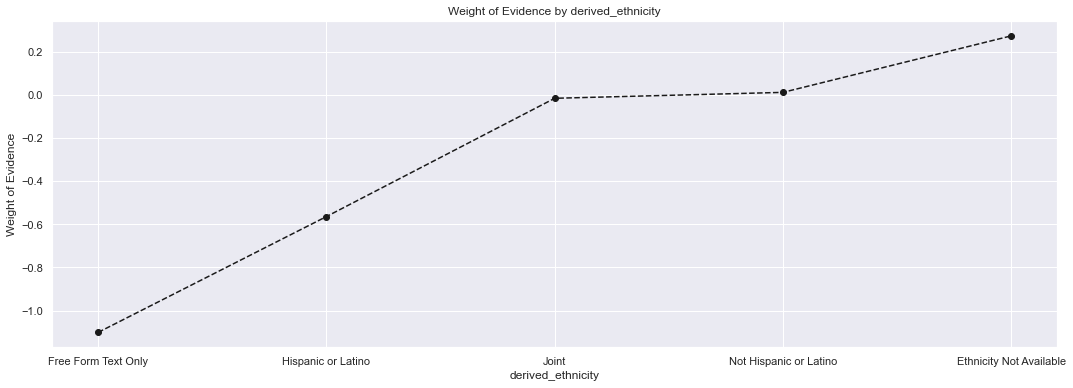

In [165]:
plot_by_woe(df_temp)

In [166]:
df_vars['derived_ethnicity:ffto_hislto'] = \
sum([df_vars['derived_ethnicity:Free Form Text Only'],
     df_vars['derived_ethnicity:Hispanic or Latino']])

df_vars['derived_ethnicity:joint_nothislat'] = \
sum([df_vars['derived_ethnicity:Joint'],
     df_vars['derived_ethnicity:Not Hispanic or Latino']])

In [167]:
# derived_race
df_temp = woe_discrete(df_vars, 'derived_race', df_targets)
df_temp

,derived_race,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,Free Form Text Only,5,0.400000,0.000033,2.0,3.0,0.000015,0.000170,-2.423100,NaN,NaN,0.084238
1,2 or more minority races,138,0.702899,0.000919,97.0,41.0,0.000732,0.002327,-1.156496,0.302899,1.266604,0.084238
2,American Indian or Alaska Native,423,0.709220,0.002817,300.0,123.0,0.002264,0.006980,-1.126037,0.006321,0.030459,0.084238
3,Black or African American,8035,0.749098,0.053517,6019.0,2016.0,0.045420,0.114409,-0.923829,0.039878,0.202208,0.084238
4,Native Hawaiian or Other Pacific Islander,138,0.753623,0.000919,104.0,34.0,0.000785,0.001930,-0.899604,0.004525,0.024225,0.084238
5,Asian,9158,0.874864,0.060996,8012.0,1146.0,0.060459,0.065036,-0.072972,0.121240,0.826632,0.084238
6,White,99027,0.888556,0.659564,87991.0,11036.0,0.663988,0.626298,0.058437,0.013692,0.131409,0.084238
7,Joint,2291,0.894806,0.015259,2050.0,241.0,0.015469,0.013677,0.123163,0.006250,0.064726,0.084238
8,Race Not Available,30925,0.903605,0.205974,27944.0,2981.0,0.210868,0.169173,0.220309,0.008800,0.097146,0.084238


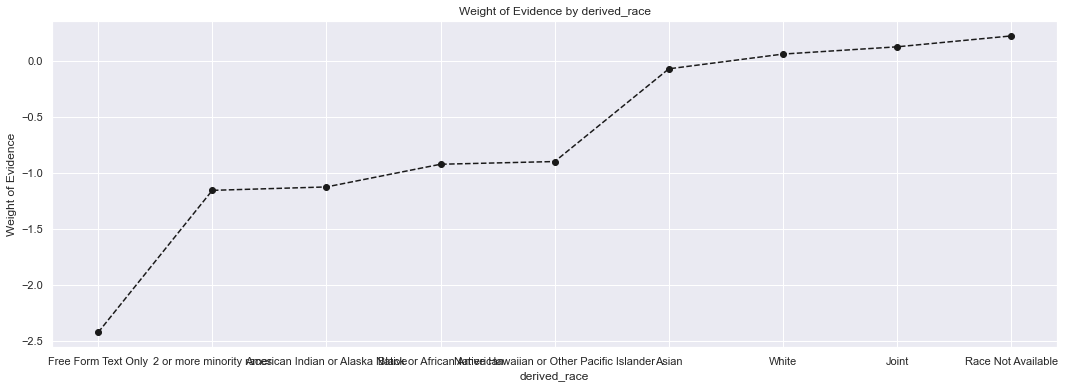

In [168]:
plot_by_woe(df_temp)

In [169]:
df_vars['derived_race:ffto_2more'] = \
sum([df_vars['derived_race:Free Form Text Only'],
     df_vars['derived_race:2 or more minority races']])

df_vars['derived_race:aia_baa_nwop'] = \
sum([df_vars['derived_race:American Indian or Alaska Native'],
     df_vars['derived_race:Black or African American'],
     df_vars['derived_race:Native Hawaiian or Other Pacific Islander']])

In [170]:
# derived_sex
df_temp = woe_discrete(df_vars, 'derived_sex', df_targets)
df_temp

,derived_sex,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,Female,28313,0.844524,0.188577,23911.0,4402.0,0.180435,0.249816,-0.325355,NaN,NaN,0.111317
1,Male,45245,0.852978,0.301352,38593.0,6652.0,0.291226,0.377504,-0.259481,0.008455,0.065874,0.111317
2,Joint,53880,0.906236,0.358865,48828.0,5052.0,0.368460,0.286703,0.250885,0.053258,0.510366,0.111317
3,Sex Not Available,22702,0.933266,0.151206,21187.0,1515.0,0.159879,0.085977,0.620338,0.027030,0.369453,0.111317


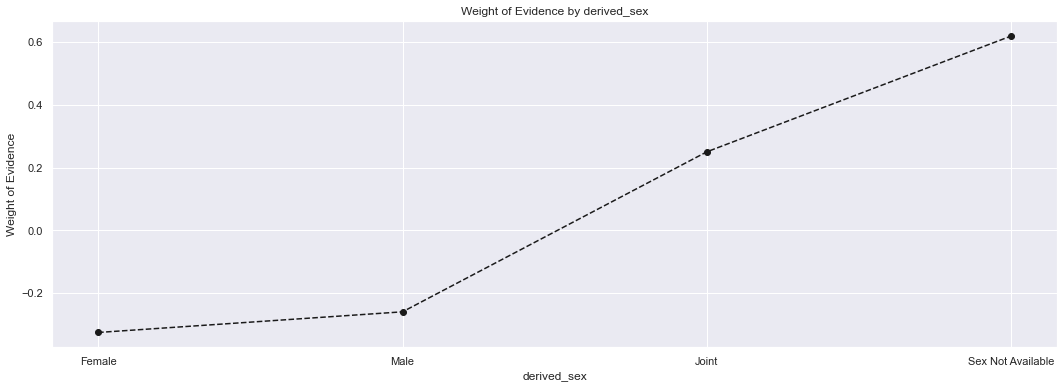

In [171]:
plot_by_woe(df_temp)

In [172]:
# preapproval
df_temp = woe_discrete(df_vars, 'preapproval', df_targets)
df_temp

,preapproval,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,2,148230,0.881745,0.987279,130701.0,17529.0,0.986281,0.994779,-0.008579,NaN,NaN,0.008282
1,1,1910,0.951832,0.012721,1818.0,92.0,0.013719,0.005221,0.966069,0.070088,0.974648,0.008282


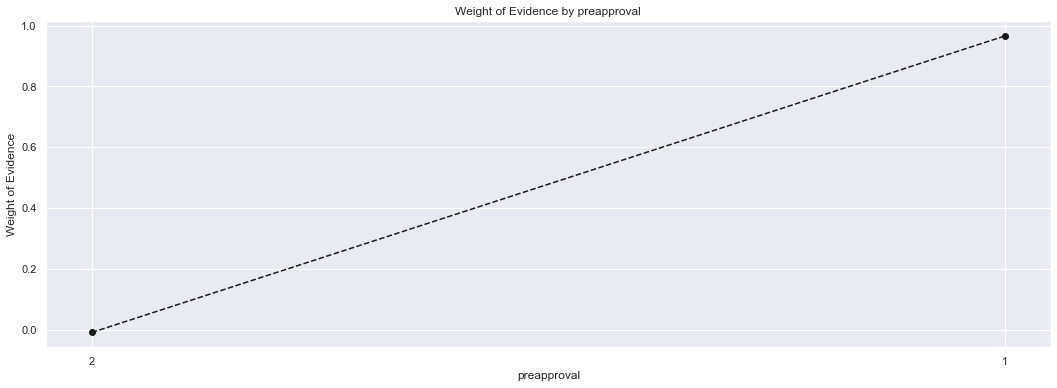

In [173]:
plot_by_woe(df_temp)

In [174]:
# loan_type
df_temp = woe_discrete(df_vars, 'loan_type', df_targets)
df_temp

,loan_type,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,1,121035,0.879853,0.806148,106493.0,14542.0,0.803606,0.825265,-0.026596,NaN,NaN,0.003203
1,2,20037,0.892798,0.133455,17889.0,2148.0,0.134992,0.121900,0.102014,0.012945,0.128611,0.003203
2,3,7986,0.897070,0.053190,7164.0,822.0,0.054060,0.046649,0.147449,0.004272,0.045435,0.003203
3,4,1082,0.899261,0.007207,973.0,109.0,0.007342,0.006186,0.171402,0.002191,0.023953,0.003203


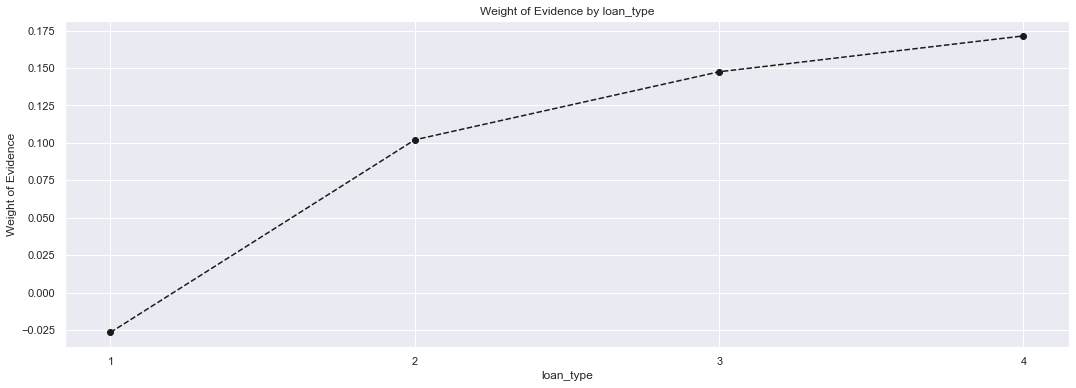

In [175]:
plot_by_woe(df_temp)

In [176]:
df_vars['loan_type:3_4'] = \
sum([df_vars['loan_type:3'],
     df_vars['loan_type:4']])

In [177]:
# loan_purpose
df_temp = woe_discrete(df_vars, 'loan_purpose', df_targets)
df_temp

,loan_purpose,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,4,4483,0.563908,0.029859,2528.0,1955.0,0.019077,0.110947,-1.760596,NaN,NaN,0.495781
1,2,4183,0.573512,0.027861,2399.0,1784.0,0.018103,0.101243,-1.721441,0.009604,0.039156,0.495781
2,32,16891,0.858741,0.112502,14505.0,2386.0,0.109456,0.135407,-0.212760,0.285230,1.508681,0.495781
3,31,72715,0.898192,0.484315,65312.0,7403.0,0.492850,0.420124,0.159656,0.039450,0.372415,0.495781
4,1,48519,0.915683,0.323158,44428.0,4091.0,0.335258,0.232166,0.367446,0.017491,0.207790,0.495781
5,5,3349,0.999403,0.022306,3347.0,2.0,0.025257,0.000114,5.405038,0.083720,5.037592,0.495781


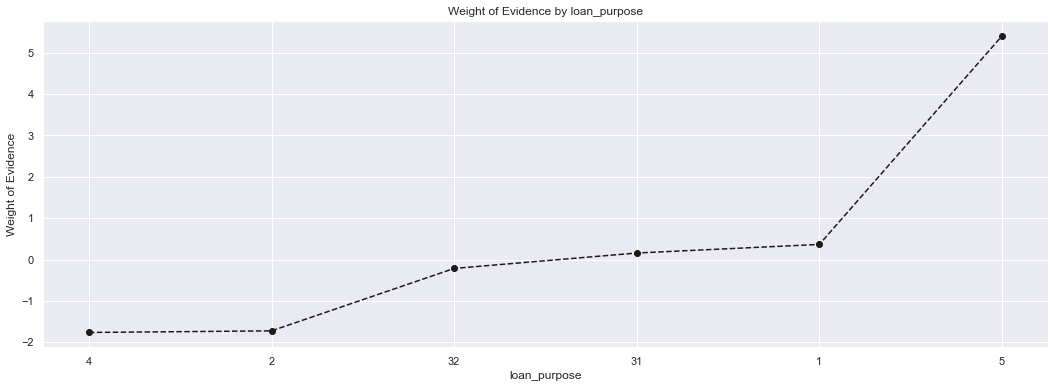

In [178]:
plot_by_woe(df_temp)

In [179]:
df_vars['loan_purpose:2_4'] = \
sum([df_vars['loan_purpose:2'],
     df_vars['loan_purpose:4']])

In [180]:
# lien_status
df_temp = woe_discrete(df_vars, 'lien_status', df_targets)
df_temp

,lien_status,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,2,7714,0.609282,0.051379,4700.0,3014.0,0.035467,0.171046,-1.57334,NaN,NaN,0.23385
1,1,142426,0.897441,0.948621,127819.0,14607.0,0.964533,0.828954,0.15148,0.28816,1.72482,0.23385


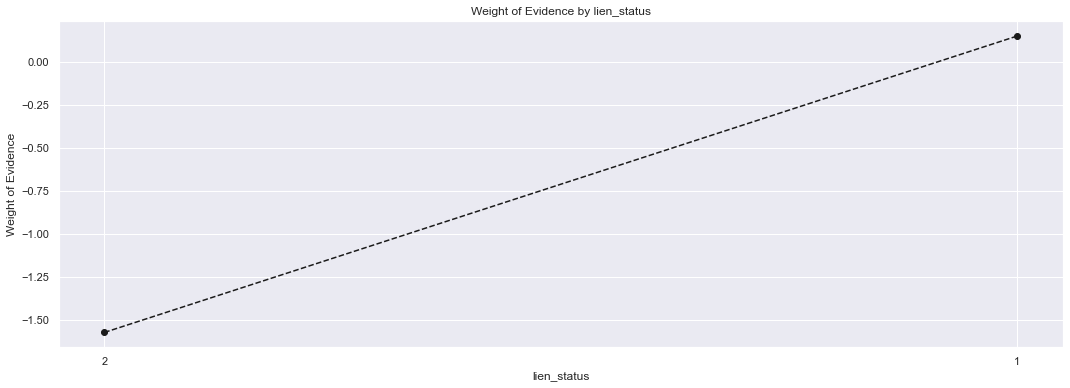

In [181]:
plot_by_woe(df_temp)

In [182]:
# reverse_mortgage
df_temp = woe_discrete(df_vars, 'reverse_mortgage', df_targets)
df_temp

,reverse_mortgage,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,2,142136,0.880417,0.946690,125139.0,16997.0,0.944310,0.964588,-0.021246,NaN,NaN,0.009617
1,1,180,0.916667,0.001199,165.0,15.0,0.001245,0.000851,0.380261,0.036249,0.401507,0.009617
2,1111,7824,0.922163,0.052111,7215.0,609.0,0.054445,0.034561,0.454465,0.005496,0.074204,0.009617


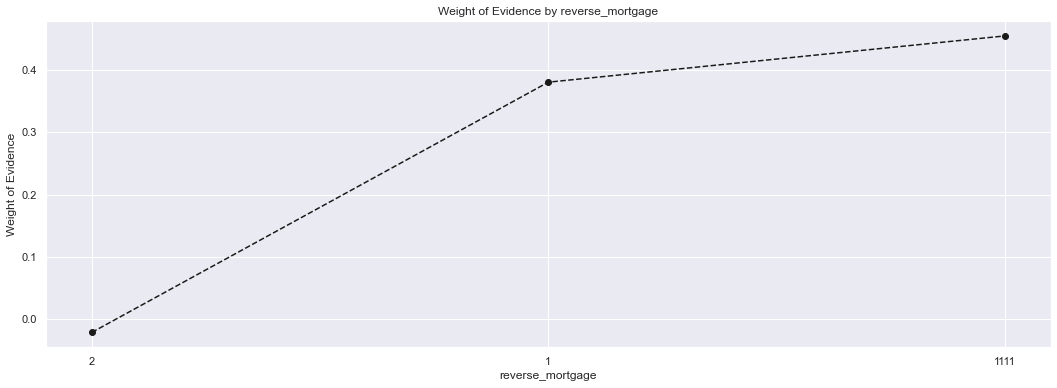

In [183]:
plot_by_woe(df_temp)

In [184]:
df_vars['reverse_mortgage:1_2'] = \
sum([df_vars['reverse_mortgage:1'],
     df_vars['reverse_mortgage:2']])

In [185]:
# open-end_line_of_credit
df_temp = woe_discrete(df_vars, 'open-end_line_of_credit', df_targets)
df_temp

,open-end_line_of_credit,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,1,7989,0.608462,0.053210,4861.0,3128.0,0.036682,0.177515,-1.576784,NaN,NaN,0.248336
1,2,134325,0.896646,0.894665,120442.0,13883.0,0.908866,0.787867,0.142869,0.288185,1.719653,0.248336
2,1111,7826,0.922055,0.052125,7216.0,610.0,0.054453,0.034618,0.452962,0.025408,0.310094,0.248336


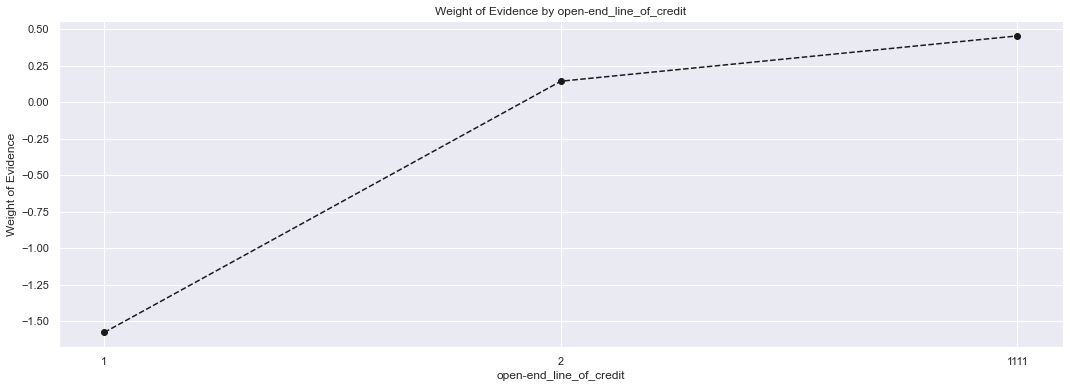

In [186]:
plot_by_woe(df_temp)

In [187]:
# business_or_commercial_purpose
df_temp = woe_discrete(df_vars, 'business_or_commercial_purpose', df_targets)
df_temp

,business_or_commercial_purpose,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,1,3961,0.826306,0.026382,3273.0,688.0,0.024698,0.039044,-0.457961,NaN,NaN,0.015704
1,2,138376,0.882010,0.921646,122049.0,16327.0,0.920992,0.926565,-0.006032,0.055703,0.451929,0.015704
2,1111,7803,0.922338,0.051971,7197.0,606.0,0.054309,0.034391,0.456905,0.040328,0.462937,0.015704


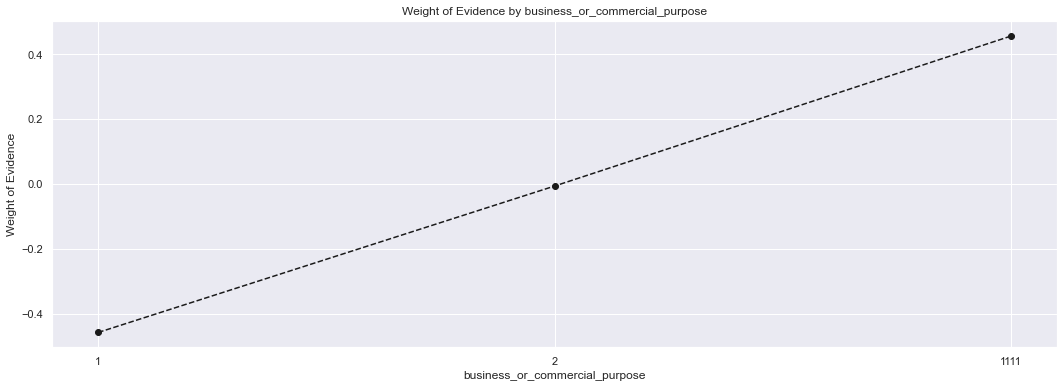

In [188]:
plot_by_woe(df_temp)

In [189]:
# negative_amortization
df_temp = woe_discrete(df_vars, 'negative_amortization', df_targets)
df_temp

,negative_amortization,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,2,142290,0.880434,0.947715,125277.0,17013.0,0.945351,0.965496,-0.021085,NaN,NaN,inf
1,1111,7819,0.922241,0.052078,7211.0,608.0,0.054415,0.034504,0.455553,0.041806,0.476639,inf
2,1,31,1.000000,0.000206,31.0,0.0,0.000234,0.000000,inf,0.077759,inf,inf


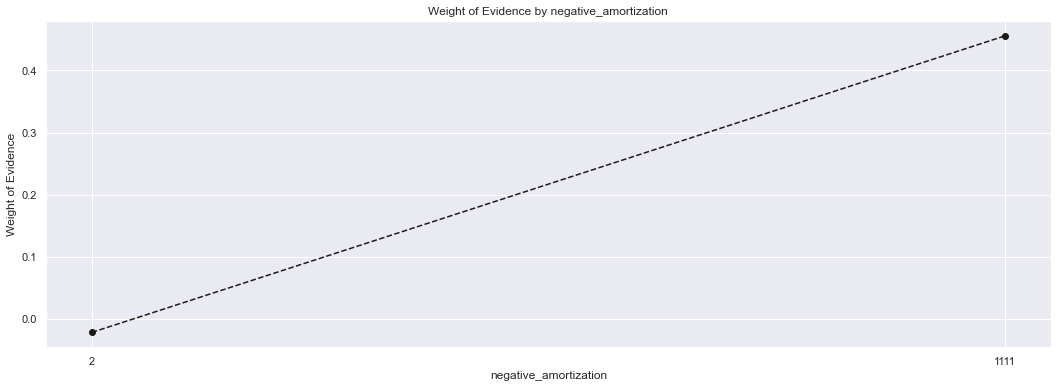

In [190]:
plot_by_woe(df_temp)

In [191]:
df_vars['negative_amortization:1_1111'] = \
sum([df_vars['negative_amortization:1'],
     df_vars['negative_amortization:1111']])

In [192]:
# interest_only_payment
df_temp = woe_discrete(df_vars, 'interest_only_payment', df_targets)
df_temp

,interest_only_payment,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,1,5223,0.693088,0.034788,3620.0,1603.0,0.027317,0.090971,-1.203038,NaN,NaN,0.087784
1,2,137098,0.887599,0.913134,121688.0,15410.0,0.918268,0.874525,0.048809,0.194510,1.251847,0.087784
2,1111,7819,0.922241,0.052078,7211.0,608.0,0.054415,0.034504,0.455553,0.034642,0.406744,0.087784


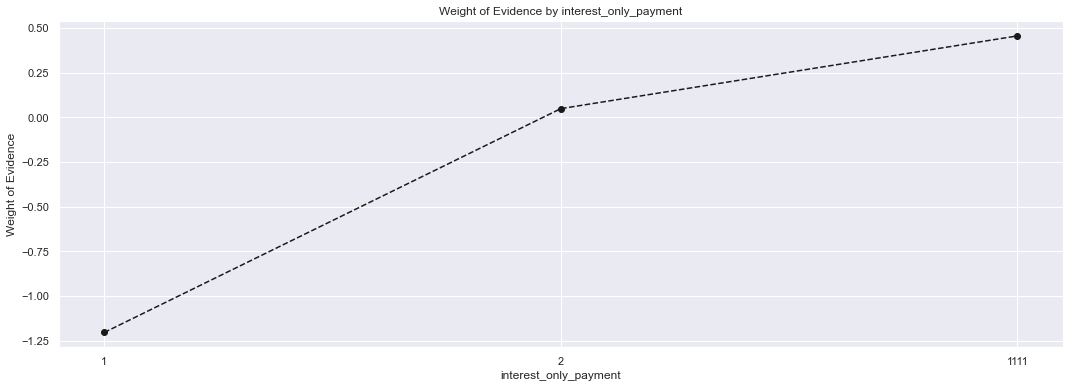

In [193]:
plot_by_woe(df_temp)

In [194]:
# balloon_payment
df_temp = woe_discrete(df_vars, 'balloon_payment', df_targets)
df_temp

,balloon_payment,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,1,1810,0.851381,0.012055,1541.0,269.0,0.011629,0.015266,-0.272159,NaN,NaN,0.010341
1,2,140511,0.880835,0.935867,123767.0,16744.0,0.933957,0.950230,-0.017274,0.029454,0.254885,0.010341
2,1111,7819,0.922241,0.052078,7211.0,608.0,0.054415,0.034504,0.455553,0.041406,0.472827,0.010341


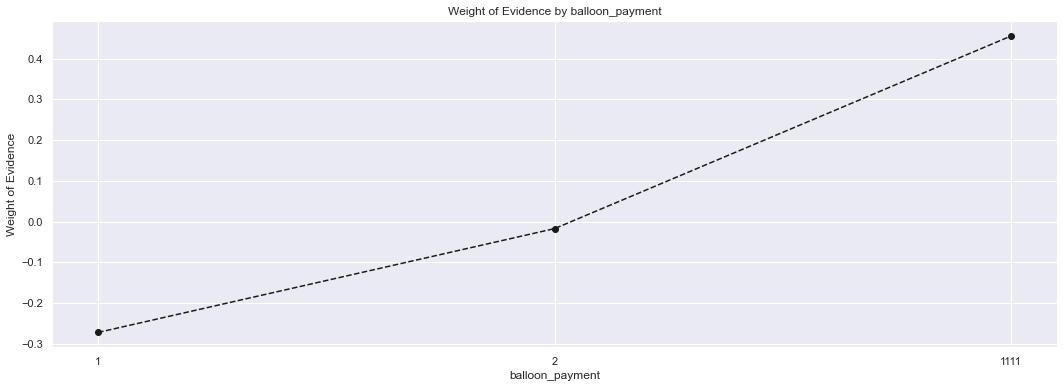

In [195]:
plot_by_woe(df_temp)

In [196]:
# other_nonamortizing_features
df_temp = woe_discrete(df_vars, 'other_nonamortizing_features', df_targets)
df_temp

,other_nonamortizing_features,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,1,572,0.561189,0.003810,321.0,251.0,0.002422,0.014244,-1.771646,NaN,NaN,0.030084
1,2,141749,0.881749,0.944112,124987.0,16762.0,0.943163,0.951251,-0.008539,0.320560,1.763107,0.030084
2,1111,7819,0.922241,0.052078,7211.0,608.0,0.054415,0.034504,0.455553,0.040492,0.464093,0.030084


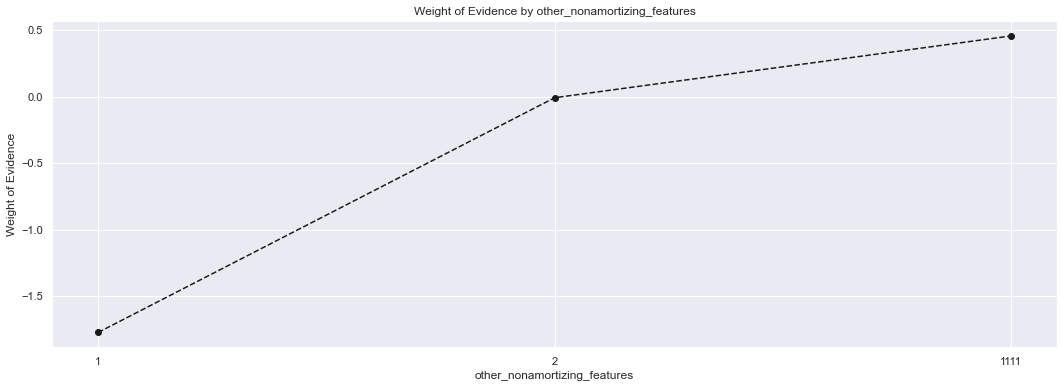

In [197]:
plot_by_woe(df_temp)

In [198]:
# construction_method
df_temp = woe_discrete(df_vars, 'construction_method', df_targets)
df_temp

,construction_method,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,2,1204,0.580565,0.008019,699.0,505.0,0.005275,0.028659,-1.692542,NaN,NaN,0.040135
1,1,148936,0.885078,0.991981,131820.0,17116.0,0.994725,0.971341,0.023789,0.304513,1.716331,0.040135


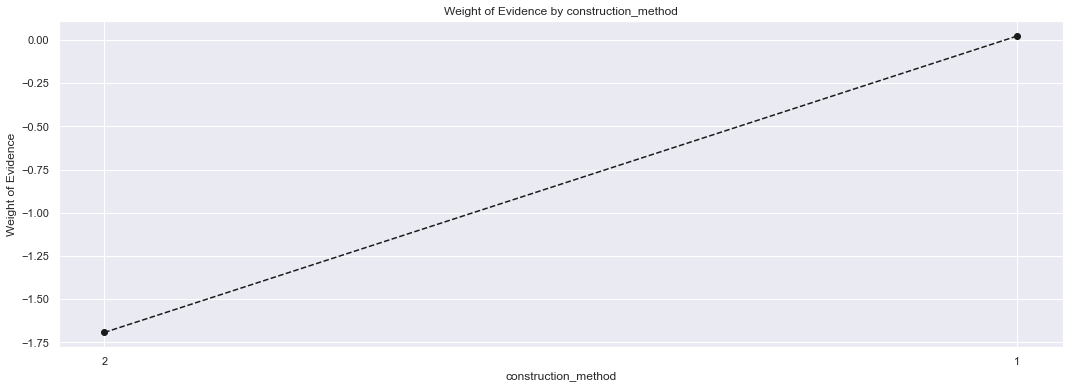

In [199]:
plot_by_woe(df_temp)

In [200]:
# occupancy_type
df_temp = woe_discrete(df_vars, 'occupancy_type', df_targets)
df_temp

,occupancy_type,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,2,1348,0.836053,0.008978,1127.0,221.0,0.008504,0.012542,-0.388483,NaN,NaN,0.008714
1,3,6986,0.840968,0.046530,5875.0,1111.0,0.044333,0.063050,-0.352189,0.004914,0.036294,0.008714
2,1,141806,0.885132,0.944492,125517.0,16289.0,0.947162,0.924408,0.024317,0.044164,0.376506,0.008714


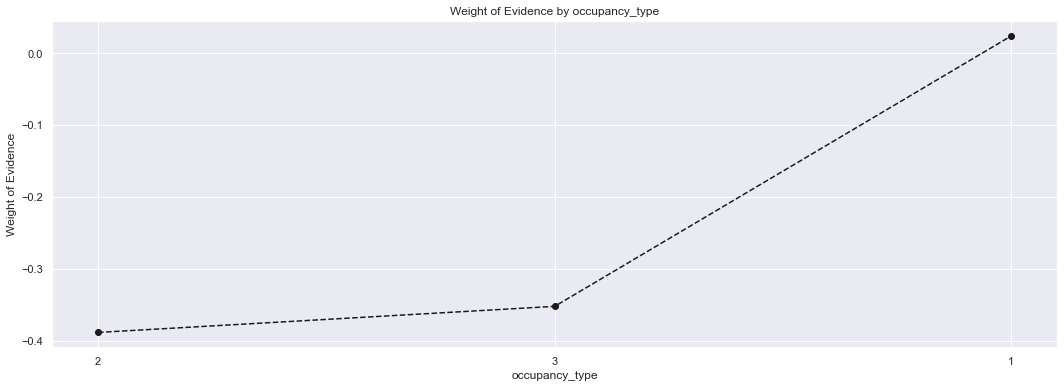

In [201]:
plot_by_woe(df_temp)

In [202]:
# manufactured_home_secured_property_type
df_temp = woe_discrete(df_vars, 'manufactured_home_secured_property_type', df_targets)
df_temp

,manufactured_home_secured_property_type,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,2,711,0.483826,0.004736,344.0,367.0,0.002596,0.020827,-2.082355,NaN,NaN,0.05326
1,1,392,0.683673,0.002611,268.0,124.0,0.002022,0.007037,-1.246929,0.199848,0.835426,0.05326
2,3,141214,0.883007,0.940549,124693.0,16521.0,0.940944,0.937574,0.003588,0.199334,1.250517,0.05326
3,1111,7823,0.922153,0.052105,7214.0,609.0,0.054437,0.034561,0.454326,0.039145,0.450738,0.05326


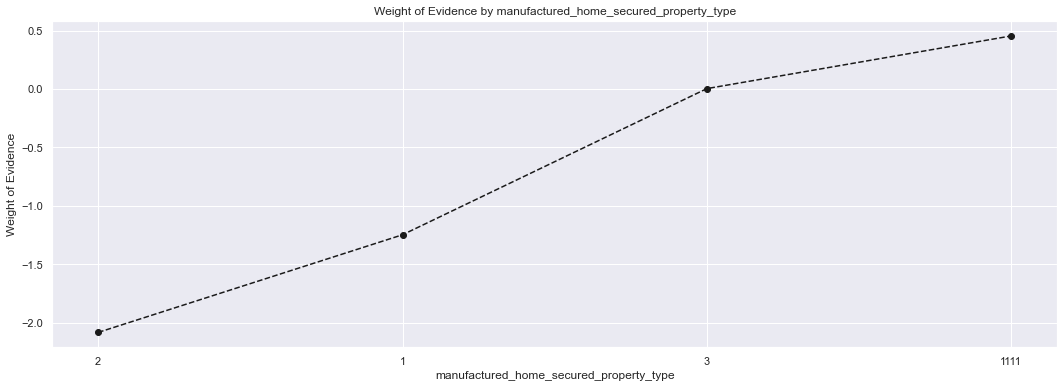

In [203]:
plot_by_woe(df_temp)

In [204]:
# manufactured_home_land_property_interest
df_temp = woe_discrete(df_vars, 'manufactured_home_land_property_interest', df_targets)
df_temp

,manufactured_home_land_property_interest,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,2,11,0.272727,0.000073,3.0,8.0,0.000023,0.000454,-2.998464,NaN,NaN,0.052386
1,3,617,0.497569,0.004109,307.0,310.0,0.002317,0.017593,-2.027359,0.224842,0.971105,0.052386
2,4,48,0.583333,0.000320,28.0,20.0,0.000211,0.001135,-1.681162,0.085764,0.346197,0.052386
3,1,426,0.640845,0.002837,273.0,153.0,0.002060,0.008683,-1.438601,0.057512,0.242562,0.052386
4,5,141215,0.883008,0.940555,124694.0,16521.0,0.940952,0.937574,0.003596,0.242163,1.442197,0.052386
5,1111,7823,0.922153,0.052105,7214.0,609.0,0.054437,0.034561,0.454326,0.039144,0.450730,0.052386


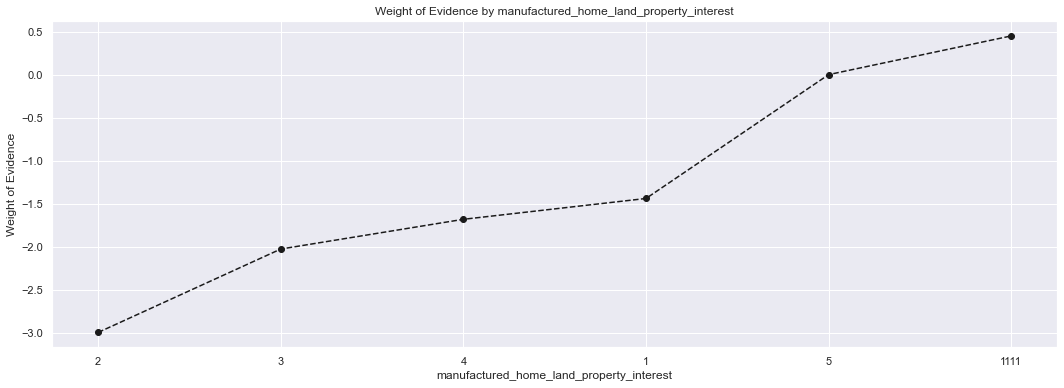

In [205]:
plot_by_woe(df_temp)

In [206]:
df_vars['manufactured_home_land_property_interest:2_3'] = \
sum([df_vars['manufactured_home_land_property_interest:2'],
     df_vars['manufactured_home_land_property_interest:3']])

df_vars['manufactured_home_land_property_interest:1_4'] = \
sum([df_vars['manufactured_home_land_property_interest:1'],
     df_vars['manufactured_home_land_property_interest:4']])

In [207]:
# total_units
df_temp = woe_discrete(df_vars, 'total_units', df_targets)
df_temp

,total_units,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,2,3583,0.800447,0.023864,2868.0,715.0,0.021642,0.040577,-0.628547,NaN,NaN,0.017795
1,3,1022,0.810176,0.006807,828.0,194.0,0.006248,0.011010,-0.566480,0.009730,0.062067,0.017795
2,4,533,0.821764,0.003550,438.0,95.0,0.003305,0.005391,-0.489293,0.011587,0.077187,0.017795
3,1,144364,0.885186,0.961529,127789.0,16575.0,0.964307,0.940639,0.024850,0.063422,0.514143,0.017795
4,>149,19,0.894737,0.000127,17.0,2.0,0.000128,0.000114,0.122432,0.009551,0.097581,0.017795
5,50-99,36,0.916667,0.000240,33.0,3.0,0.000249,0.000170,0.380261,0.021930,0.257829,0.017795
6,5-24,473,0.930233,0.003150,440.0,33.0,0.003320,0.001873,0.572633,0.013566,0.192372,0.017795
7,100-149,23,0.956522,0.000153,22.0,1.0,0.000166,0.000057,1.073408,0.026289,0.500775,0.017795
8,25-49,87,0.965517,0.000579,84.0,3.0,0.000634,0.000170,1.314570,0.008996,0.241162,0.017795


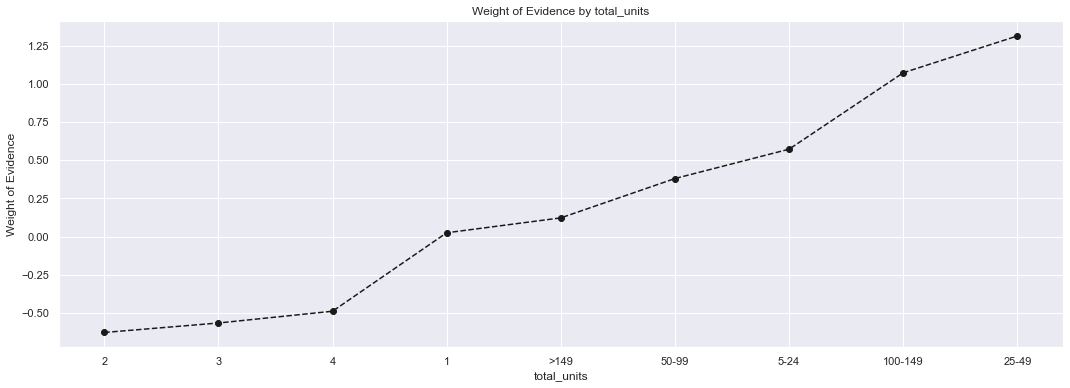

In [208]:
plot_by_woe(df_temp)

In [209]:
df_vars['total_units:2_3_4'] = \
sum([df_vars['total_units:2'],
     df_vars['total_units:3'],
     df_vars['total_units:4']])

df_vars['total_units:>25'] = \
sum([df_vars['total_units:>149'],
     df_vars['total_units:50-99'],
     df_vars['total_units:100-149'],
     df_vars['total_units:25-49']])

In [210]:
# debt_to_income_ratio
df_temp = woe_discrete(df_vars, 'debt_to_income_ratio', df_targets)
df_temp

,debt_to_income_ratio,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,>60%,3233,0.056604,0.021533,183.0,3050.0,0.001381,0.173089,-4.831045,NaN,NaN,1.272865
1,50%-60%,4688,0.521544,0.031224,2445.0,2243.0,0.018450,0.127291,-1.931404,0.464941,2.899642,1.272865
2,48,2095,0.850119,0.013954,1781.0,314.0,0.013440,0.017820,-0.282097,0.328575,1.649306,1.272865
3,49,2515,0.850895,0.016751,2140.0,375.0,0.016149,0.021281,-0.276000,0.000775,0.006098,1.272865
4,47,2088,0.855843,0.013907,1787.0,301.0,0.013485,0.017082,-0.236451,0.004948,0.039548,1.272865
5,45,2475,0.856566,0.016485,2120.0,355.0,0.015998,0.020146,-0.230581,0.000723,0.005870,1.272865
6,46,2190,0.858447,0.014586,1880.0,310.0,0.014187,0.017593,-0.215180,0.001882,0.015401,1.272865
7,<20%,11481,0.865169,0.076469,9933.0,1548.0,0.074955,0.087850,-0.158736,0.006721,0.056444,1.272865
8,44,3692,0.890303,0.024590,3287.0,405.0,0.024804,0.022984,0.076209,0.025135,0.234945,1.272865
9,43,3394,0.892752,0.022606,3030.0,364.0,0.022865,0.020657,0.101529,0.002449,0.025321,1.272865


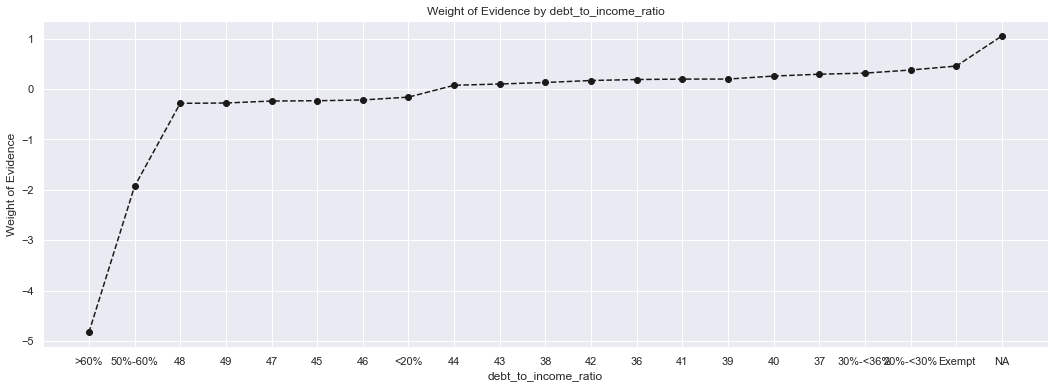

In [211]:
plot_by_woe(df_temp)

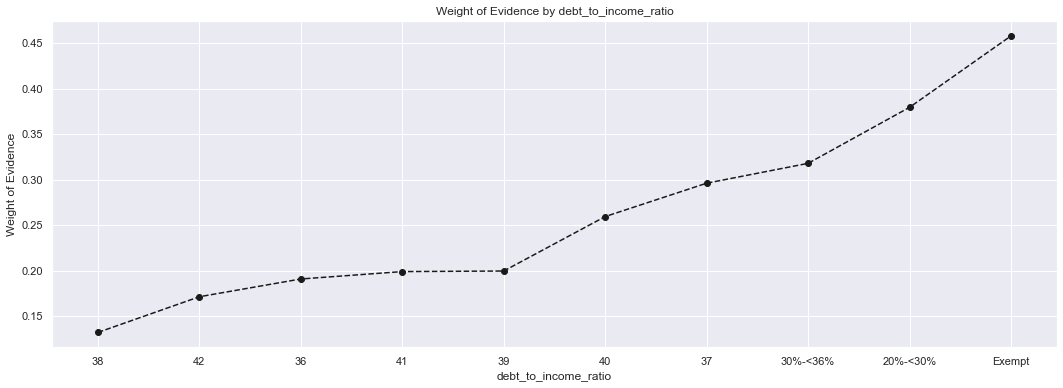

In [212]:
plot_by_woe(df_temp[10:-1])

In [213]:
df_vars['debt_to_income_ratio:46-49'] = \
sum([df_vars['debt_to_income_ratio:46'],
     df_vars['debt_to_income_ratio:47'],
     df_vars['debt_to_income_ratio:48'],
     df_vars['debt_to_income_ratio:49']])

df_vars['debt_to_income_ratio:42-44'] = \
sum([df_vars['debt_to_income_ratio:42'],
     df_vars['debt_to_income_ratio:43'],
     df_vars['debt_to_income_ratio:44']])

df_vars['debt_to_income_ratio:36-41'] = \
sum([df_vars['debt_to_income_ratio:36'],
     df_vars['debt_to_income_ratio:37'],
     df_vars['debt_to_income_ratio:38'],
     df_vars['debt_to_income_ratio:39'],
     df_vars['debt_to_income_ratio:40'],
     df_vars['debt_to_income_ratio:41']])

In [214]:
# applicant_credit_score_type
df_temp = woe_discrete(df_vars, 'applicant_credit_score_type', df_targets)
df_temp

,applicant_credit_score_type,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,4,198,0.484848,0.001319,96.0,102.0,0.000724,0.005789,-2.078259,NaN,NaN,0.503889
1,8,7475,0.521605,0.049787,3899.0,3576.0,0.029422,0.202940,-1.931159,0.036757,0.147100,0.503889
2,2,26811,0.874380,0.178573,23443.0,3368.0,0.176903,0.191136,-0.077382,0.352775,1.853778,0.503889
3,3,30021,0.877885,0.199953,26355.0,3666.0,0.198877,0.208047,-0.045078,0.003506,0.032304,0.503889
4,1,34343,0.885945,0.228740,30426.0,3917.0,0.229597,0.222292,0.032337,0.008059,0.077415,0.503889
5,5,126,0.896825,0.000839,113.0,13.0,0.000853,0.000738,0.144804,0.010881,0.112467,0.503889
6,6,670,0.897015,0.004463,601.0,69.0,0.004535,0.003916,0.146854,0.000190,0.002050,0.503889
7,1111,7815,0.922329,0.052051,7208.0,607.0,0.054392,0.034448,0.456783,0.025314,0.309930,0.503889
8,9,39396,0.945883,0.262395,37264.0,2132.0,0.281197,0.120992,0.843333,0.023554,0.386549,0.503889
9,7,3285,0.947945,0.021880,3114.0,171.0,0.023499,0.009704,0.884365,0.002062,0.041033,0.503889


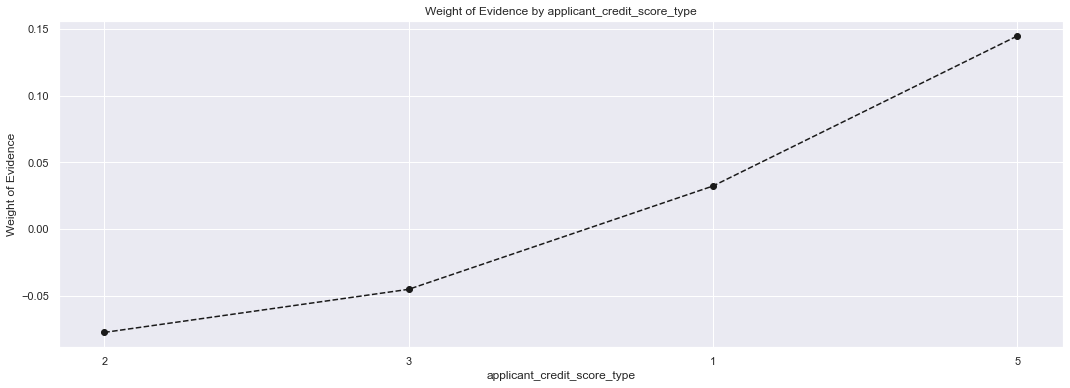

In [215]:
plot_by_woe(df_temp[2:-4])

In [216]:
df_vars['applicant_credit_score_type:4_8'] = \
sum([df_vars['applicant_credit_score_type:4'],
     df_vars['applicant_credit_score_type:8']])

df_vars['applicant_credit_score_type:5_1111'] = \
sum([df_vars['applicant_credit_score_type:5'],
     df_vars['applicant_credit_score_type:1111']])

df_vars['applicant_credit_score_type:1_6'] = \
sum([df_vars['applicant_credit_score_type:1'],
     df_vars['applicant_credit_score_type:6']])

In [217]:
# co-applicant_credit_score_type
df_temp = woe_discrete(df_vars, 'co-applicant_credit_score_type', df_targets)
df_temp

,co-applicant_credit_score_type,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,8,2033,0.650271,0.013541,1322.0,711.0,0.009976,0.040350,-1.397406,NaN,NaN,0.338817
1,10,63848,0.825695,0.425256,52719.0,11129.0,0.397822,0.631576,-0.462213,0.175425,0.935193,0.338817
2,6,32,0.875000,0.000213,28.0,4.0,0.000211,0.000227,-0.071725,0.049305,0.390489,0.338817
3,2,5238,0.888698,0.034887,4655.0,583.0,0.035127,0.033086,0.059875,0.013698,0.131600,0.338817
4,3,5989,0.900150,0.039889,5391.0,598.0,0.040681,0.033937,0.181261,0.011452,0.121385,0.338817
5,1,7143,0.908582,0.047576,6490.0,653.0,0.048974,0.037058,0.278806,0.008432,0.097545,0.338817
6,1111,7815,0.922329,0.052051,7208.0,607.0,0.054392,0.034448,0.456783,0.013747,0.177977,0.338817
7,7,439,0.933941,0.002924,410.0,29.0,0.003094,0.001646,0.631227,0.011612,0.174443,0.338817
8,4,31,0.935484,0.000206,29.0,2.0,0.000219,0.000114,0.656514,0.001543,0.025287,0.338817
9,9,57517,0.942556,0.383089,54213.0,3304.0,0.409096,0.187504,0.780152,0.007072,0.123638,0.338817


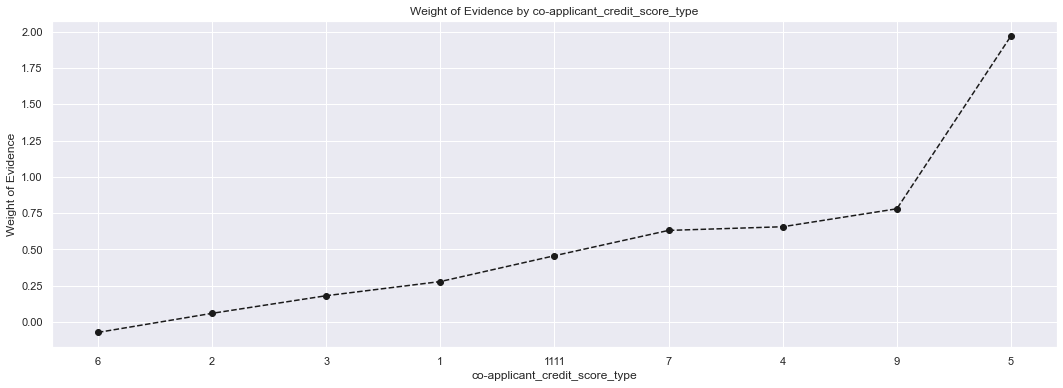

In [218]:
plot_by_woe(df_temp[2:])

In [219]:
df_vars['co-applicant_credit_score_type:2_4_6'] = \
sum([df_vars['co-applicant_credit_score_type:2'],
     df_vars['co-applicant_credit_score_type:4'],
     df_vars['co-applicant_credit_score_type:6']])

df_vars['co-applicant_credit_score_type:5_7_9'] = \
sum([df_vars['co-applicant_credit_score_type:5'],
     df_vars['co-applicant_credit_score_type:7'],
     df_vars['co-applicant_credit_score_type:9']])

In [220]:
# applicant_age
df_temp = woe_discrete(df_vars, 'applicant_age', df_targets)
df_temp

,applicant_age,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,>74,3175,0.785512,0.021147,2494.0,681.0,0.018820,0.038647,-0.719554,NaN,NaN,0.272875
1,65-74,10024,0.826915,0.066764,8289.0,1735.0,0.062550,0.098462,-0.453713,0.041404,0.265841,0.272875
2,55-64,20293,0.837432,0.135161,16994.0,3299.0,0.128238,0.187220,-0.378394,0.010516,0.075319,0.272875
3,45-54,30456,0.860159,0.202851,26197.0,4259.0,0.197685,0.241700,-0.201024,0.022727,0.177370,0.272875
4,<25,3077,0.870653,0.020494,2679.0,398.0,0.020216,0.022587,-0.110888,0.010494,0.090136,0.272875
5,35-44,39613,0.889834,0.263840,35249.0,4364.0,0.265992,0.247659,0.071413,0.019181,0.182301,0.272875
6,25-34,28700,0.908118,0.191155,26063.0,2637.0,0.196674,0.149651,0.273240,0.018284,0.201827,0.272875
7,8888,14802,0.983246,0.098588,14554.0,248.0,0.109826,0.014074,2.054558,0.075127,1.781318,0.272875


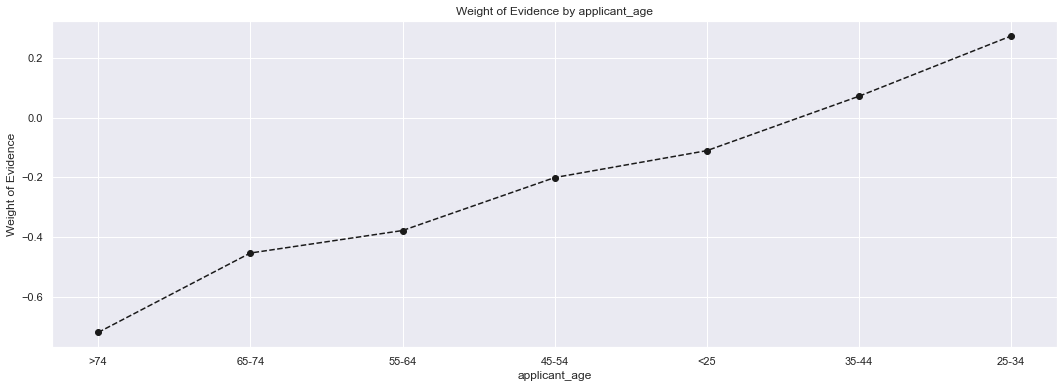

In [221]:
plot_by_woe(df_temp[:-1])

In [222]:
# submission_of_application
df_temp = woe_discrete(df_vars, 'submission_of_application', df_targets)
df_temp

,submission_of_application,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,1,107807,0.854453,0.718043,92116.0,15691.0,0.695115,0.890472,-0.247673,NaN,NaN,inf
1,2,14413,0.908277,0.095997,13091.0,1322.0,0.098786,0.075024,0.275145,0.053824,0.522818,inf
2,1111,7819,0.922241,0.052078,7211.0,608.0,0.054415,0.034504,0.455553,0.013963,0.180409,inf
3,3,20101,1.000000,0.133882,20101.0,0.0,0.151684,0.000000,inf,0.077759,inf,inf


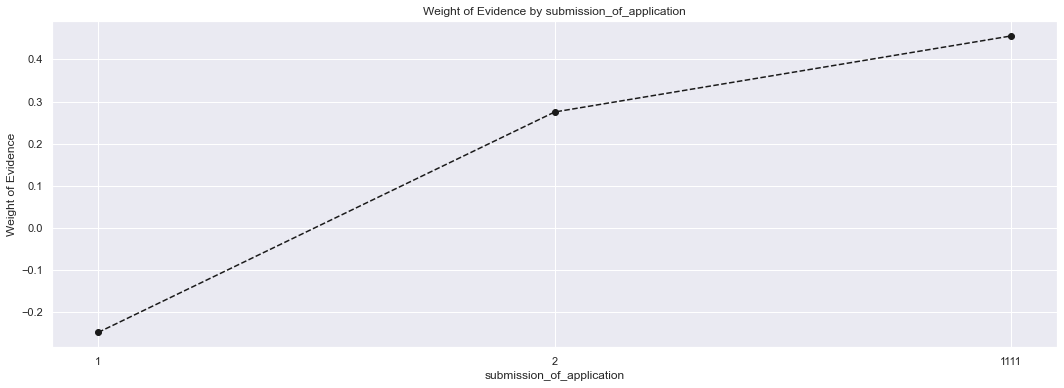

In [223]:
plot_by_woe(df_temp)

In [224]:
# initially_payable_to_institution
df_temp = woe_discrete(df_vars, 'initially_payable_to_institution', df_targets)
df_temp

,initially_payable_to_institution,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,1,113729,0.872908,0.757486,99275.0,14454.0,0.749138,0.820271,-0.090712,NaN,NaN,0.031253
1,3,22590,0.908898,0.150460,20532.0,2058.0,0.154936,0.116792,0.282615,0.035989,0.373327,0.031253
2,2,6002,0.916528,0.039976,5501.0,501.0,0.041511,0.028432,0.378444,0.007630,0.095829,0.031253
3,1111,7819,0.922241,0.052078,7211.0,608.0,0.054415,0.034504,0.455553,0.005713,0.077109,0.031253


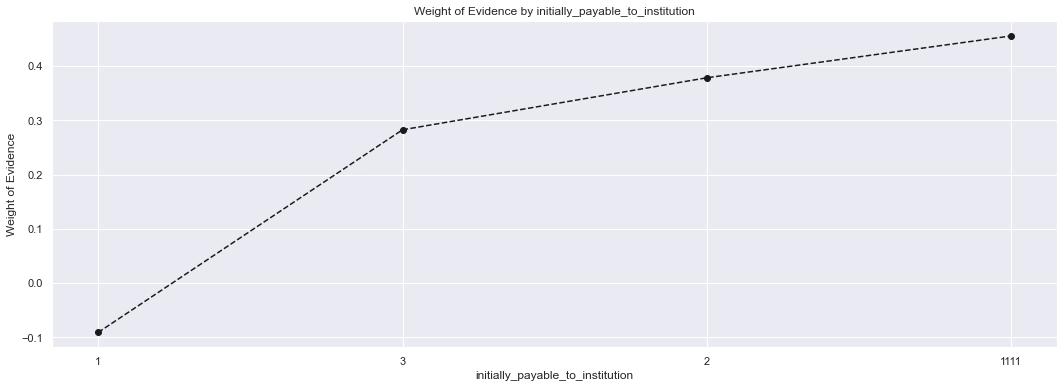

In [225]:
plot_by_woe(df_temp)

In [226]:
# aus-1
df_temp = woe_discrete(df_vars, 'aus-1', df_targets)
df_temp

,aus-1,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,5,5573,0.617800,0.037119,3443.0,2130.0,0.025981,0.120878,-1.537413,NaN,NaN,0.283606
1,3,5029,0.827799,0.033495,4163.0,866.0,0.031414,0.049146,-0.447528,0.209999,1.089885,0.283606
2,6,45937,0.846921,0.305961,38905.0,7032.0,0.293581,0.399069,-0.306983,0.019122,0.140545,0.283606
3,1,58142,0.912215,0.387252,53038.0,5104.0,0.400229,0.289654,0.323349,0.065294,0.630332,0.283606
4,1111,7824,0.922163,0.052111,7215.0,609.0,0.054445,0.034561,0.454465,0.009948,0.131115,0.283606
5,4,509,0.925344,0.003390,471.0,38.0,0.003554,0.002157,0.499637,0.003181,0.045173,0.283606
6,2,27126,0.932095,0.180671,25284.0,1842.0,0.190795,0.104534,0.601685,0.006751,0.102048,0.283606


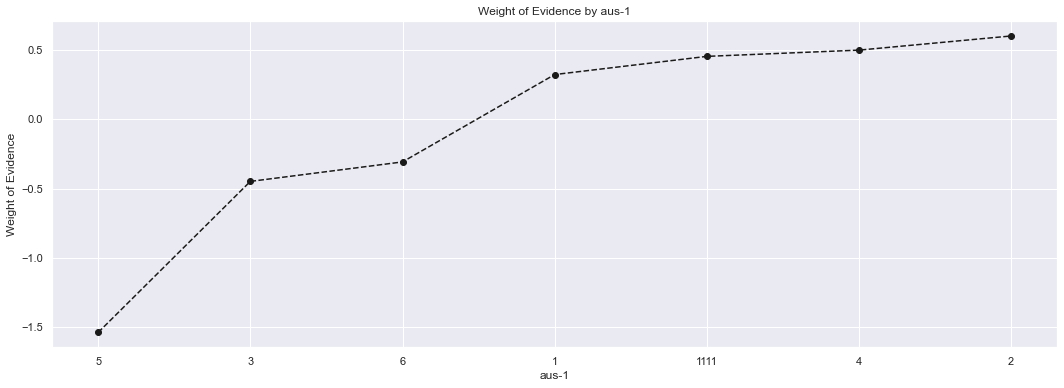

In [227]:
plot_by_woe(df_temp)

In [228]:
df_vars['aus-1:2_4'] = \
sum([df_vars['aus-1:2'],
     df_vars['aus-1:4']])

### Continuous Variables

In [229]:
def woe_ordered_continuous(df, discrete_variabe_name, good_bad_variable_df):
    df = pd.concat([df[discrete_variabe_name], good_bad_variable_df], axis = 1)
    df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
                    df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)
    df = df.iloc[:, [0, 1, 3]]
    df.columns = [df.columns.values[0], 'n_obs', 'prop_good']
    df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum()
    df['n_good'] = df['prop_good'] * df['n_obs']
    df['n_bad'] = (1 - df['prop_good']) * df['n_obs']
    df['prop_n_good'] = df['n_good'] / df['n_good'].sum()
    df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum()
    df['WoE'] = np.log(df['prop_n_good'] / df['prop_n_bad'])
    #df = df.sort_values(['WoE'])
    #df = df.reset_index(drop = True)
    df['diff_prop_good'] = df['prop_good'].diff().abs()
    df['diff_WoE'] = df['WoE'].diff().abs()
    df['IV'] = (df['prop_n_good'] - df['prop_n_bad']) * df['WoE']
    df['IV'] = df['IV'].sum()
    return df

In [230]:
# set boundary values and clip all numercial variables
for var in num_vars:
    values = df_vars[var]
    q1 = values.quantile(0.25)
    q3 = values.quantile(0.75)
    
    iqr = q3 - q1
    lw = q1 - 1.5 * iqr
    hw = q3 + 1.5 * iqr
    
    df_vars[var] = df_vars[var].clip(lw, hw)

In [231]:
pd.options.display.max_rows = None

In [232]:
# loan_amount
var_name = 'loan_amount'
bin_num = 50
df_vars[f'{var_name}_factor'] = pd.cut(df_vars[var_name], bin_num)
df_temp = woe_ordered_continuous(df_vars, f'{var_name}_factor', df_targets)
df_temp

,loan_amount_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(4455.0, 15900.0]",1819,0.692139,0.012115,1259.0,560.0,0.009501,0.031780,-1.207498,NaN,NaN,0.33308
1,"(15900.0, 26800.0]",1762,0.568104,0.011736,1001.0,761.0,0.007554,0.043187,-1.743513,0.124034,0.536015,0.33308
2,"(26800.0, 37700.0]",1882,0.608927,0.012535,1146.0,736.0,0.008648,0.041768,-1.574832,0.040822,0.168681,0.33308
3,"(37700.0, 48600.0]",1861,0.687265,0.012395,1279.0,582.0,0.009651,0.033029,-1.230271,0.078338,0.344561,0.33308
4,"(48600.0, 59500.0]",3094,0.710730,0.020607,2199.0,895.0,0.016594,0.050792,-1.118700,0.023466,0.111571,0.33308
5,"(59500.0, 70400.0]",2896,0.787638,0.019289,2281.0,615.0,0.017213,0.034902,-0.706888,0.076908,0.411813,0.33308
6,"(70400.0, 81300.0]",3416,0.821721,0.022752,2807.0,609.0,0.021182,0.034561,-0.489581,0.034083,0.217306,0.33308
7,"(81300.0, 92200.0]",3527,0.838106,0.023491,2956.0,571.0,0.022306,0.032405,-0.373432,0.016385,0.116150,0.33308
8,"(92200.0, 103100.0]",3611,0.869565,0.024051,3140.0,471.0,0.023695,0.026729,-0.120515,0.031459,0.252917,0.33308
9,"(103100.0, 114000.0]",5296,0.837236,0.035274,4434.0,862.0,0.033459,0.048919,-0.379833,0.032330,0.259318,0.33308


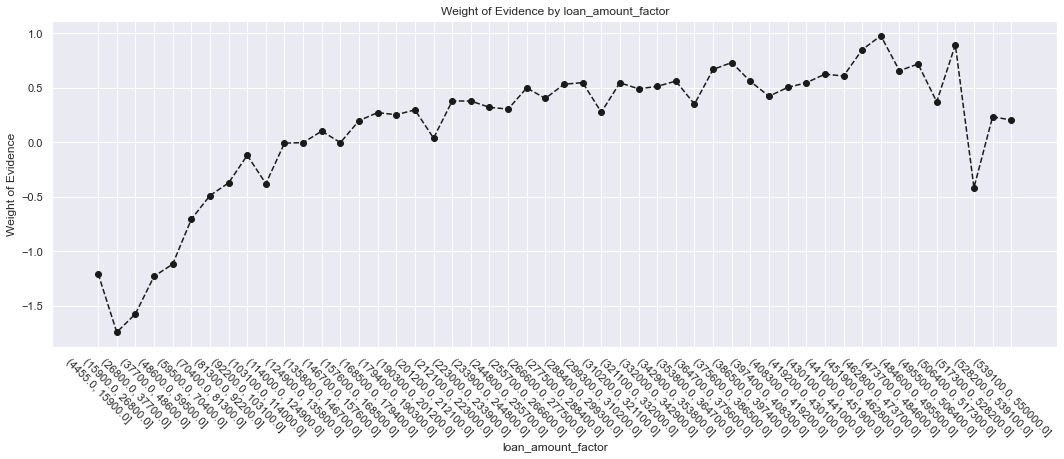

In [233]:
plot_by_woe(df_temp, -45)

In [234]:
df_vars[f'{var_name}:<70400'] = \
np.where((df_vars[var_name] <= 70400), 1, 0)

df_vars[f'{var_name}:70400-124900'] = \
np.where((df_vars[var_name] > 70400) & (df_vars[var_name] <= 124900), 1, 0)

df_vars[f'{var_name}:124900-22300'] = \
np.where((df_vars[var_name] > 124900) & (df_vars[var_name] <= 223000), 1, 0)

df_vars[f'{var_name}:223000-321100'] = \
np.where((df_vars[var_name] > 223000) & (df_vars[var_name] <= 321100), 1, 0)

df_vars[f'{var_name}:321100-473700'] = \
np.where((df_vars[var_name] > 321100) & (df_vars[var_name] <= 473700), 1, 0)

df_vars[f'{var_name}:>473700'] = \
np.where((df_vars[var_name] > 473700), 1, 0)

In [235]:
# loan_to_value_ratio
var_name = 'loan_to_value_ratio'
bin_num = 50
df_vars[f'{var_name}_factor'] = pd.cut(df_vars[var_name], bin_num)
df_temp = woe_ordered_continuous(df_vars, f'{var_name}_factor', df_targets)
df_temp

,loan_to_value_ratio_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(55.914, 56.819]",15180,0.839394,0.101106,12742.0,2438.0,0.096152,0.138358,-0.363909,NaN,NaN,0.2185
1,"(56.819, 57.681]",848,0.873821,0.005648,741.0,107.0,0.005592,0.006072,-0.082463,0.034427,0.281446,0.2185
2,"(57.681, 58.543]",1014,0.884615,0.006754,897.0,117.0,0.006769,0.006640,0.019247,0.010795,0.101710,0.2185
3,"(58.543, 59.405]",1192,0.909396,0.007939,1084.0,108.0,0.008180,0.006129,0.288647,0.024781,0.269400,0.2185
4,"(59.405, 60.267]",1956,0.901329,0.013028,1763.0,193.0,0.013304,0.010953,0.194447,0.008067,0.094200,0.2185
5,"(60.267, 61.129]",715,0.868531,0.004762,621.0,94.0,0.004686,0.005335,-0.129598,0.032798,0.324046,0.2185
6,"(61.129, 61.991]",668,0.848802,0.004449,567.0,101.0,0.004279,0.005732,-0.292396,0.019729,0.162798,0.2185
7,"(61.991, 62.853]",916,0.859170,0.006101,787.0,129.0,0.005939,0.007321,-0.209219,0.010368,0.083177,0.2185
8,"(62.853, 63.715]",967,0.861427,0.006441,833.0,134.0,0.006286,0.007605,-0.190441,0.002257,0.018778,0.2185
9,"(63.715, 64.577]",1081,0.874191,0.007200,945.0,136.0,0.007131,0.007718,-0.079105,0.012763,0.111336,0.2185


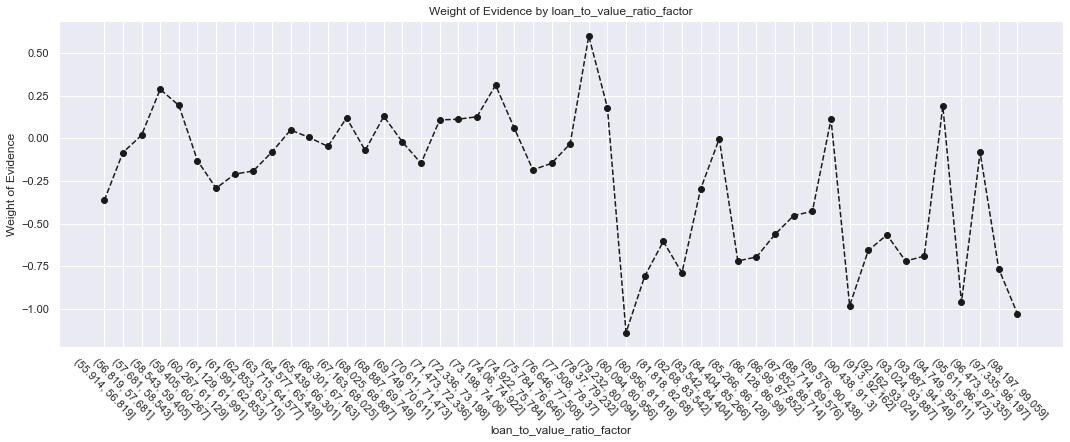

In [236]:
plot_by_woe(df_temp, -45)
# No clear association with this variable -> no need to create dummy variables

In [237]:
# interest_rate
var_name = 'interest_rate'
bin_num = 50
df_vars[f'{var_name}_factor'] = pd.cut(df_vars[var_name], bin_num)
df_temp = woe_ordered_continuous(df_vars, f'{var_name}_factor', df_targets)
df_temp
# directly linked to target

G:\Anaconda\lib\site-packages\pandas\core\algorithms.py:1977: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


,interest_rate_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(2.123, 2.165]",1431,1.000000,0.009531,1431.0,0.0,0.010798,0.0,inf,NaN,NaN,inf
1,"(2.165, 2.205]",41,1.000000,0.000273,41.0,0.0,0.000309,0.0,inf,0.000000,NaN,inf
2,"(2.205, 2.245]",68,1.000000,0.000453,68.0,0.0,0.000513,0.0,inf,0.000000,NaN,inf
3,"(2.245, 2.285]",2391,1.000000,0.015925,2391.0,0.0,0.018043,0.0,inf,0.000000,NaN,inf
4,"(2.285, 2.325]",52,1.000000,0.000346,52.0,0.0,0.000392,0.0,inf,0.000000,NaN,inf
5,"(2.325, 2.365]",44,1.000000,0.000293,44.0,0.0,0.000332,0.0,inf,0.000000,NaN,inf
6,"(2.365, 2.405]",2613,1.000000,0.017404,2613.0,0.0,0.019718,0.0,inf,0.000000,NaN,inf
7,"(2.405, 2.445]",46,1.000000,0.000306,46.0,0.0,0.000347,0.0,inf,0.000000,NaN,inf
8,"(2.445, 2.485]",107,1.000000,0.000713,107.0,0.0,0.000807,0.0,inf,0.000000,NaN,inf
9,"(2.485, 2.525]",5263,1.000000,0.035054,5263.0,0.0,0.039715,0.0,inf,0.000000,NaN,inf


In [238]:
# rate_spread
var_name = 'rate_spread'
bin_num = 50
df_vars[f'{var_name}_factor'] = pd.cut(df_vars[var_name], bin_num)
df_temp = woe_ordered_continuous(df_vars, f'{var_name}_factor', df_targets)
df_temp
# directly linked to target

G:\Anaconda\lib\site-packages\pandas\core\algorithms.py:1977: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


,rate_spread_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-0.259, -0.24]",12746,1.000000,0.084894,12746.0,0.0,0.096182,0.0,inf,NaN,NaN,inf
1,"(-0.24, -0.222]",927,1.000000,0.006174,927.0,0.0,0.006995,0.0,inf,0.000000,NaN,inf
2,"(-0.222, -0.204]",977,1.000000,0.006507,977.0,0.0,0.007373,0.0,inf,0.000000,NaN,inf
3,"(-0.204, -0.186]",1019,1.000000,0.006787,1019.0,0.0,0.007689,0.0,inf,0.000000,NaN,inf
4,"(-0.186, -0.168]",1060,1.000000,0.007060,1060.0,0.0,0.007999,0.0,inf,0.000000,NaN,inf
5,"(-0.168, -0.15]",1137,1.000000,0.007573,1137.0,0.0,0.008580,0.0,inf,0.000000,NaN,inf
6,"(-0.15, -0.133]",1325,1.000000,0.008825,1325.0,0.0,0.009999,0.0,inf,0.000000,NaN,inf
7,"(-0.133, -0.115]",1404,1.000000,0.009351,1404.0,0.0,0.010595,0.0,inf,0.000000,NaN,inf
8,"(-0.115, -0.0967]",1436,1.000000,0.009564,1436.0,0.0,0.010836,0.0,inf,0.000000,NaN,inf
9,"(-0.0967, -0.0788]",1488,1.000000,0.009911,1488.0,0.0,0.011229,0.0,inf,0.000000,NaN,inf


In [239]:
# total_loan_costs
var_name = 'total_loan_costs'
bin_num = 50
df_vars[f'{var_name}_factor'] = pd.cut(df_vars[var_name], bin_num)
df_temp = woe_ordered_continuous(df_vars, f'{var_name}_factor', df_targets)
df_temp
# directly linked to target

G:\Anaconda\lib\site-packages\pandas\core\algorithms.py:1977: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


,total_loan_costs_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-7.094, 141.888]",2720,1.000000,0.018116,2720.0,0.0,0.020525,0.0,inf,NaN,NaN,inf
1,"(141.888, 283.776]",282,1.000000,0.001878,282.0,0.0,0.002128,0.0,inf,0.000000,NaN,inf
2,"(283.776, 425.664]",324,1.000000,0.002158,324.0,0.0,0.002445,0.0,inf,0.000000,NaN,inf
3,"(425.664, 567.551]",1047,1.000000,0.006973,1047.0,0.0,0.007901,0.0,inf,0.000000,NaN,inf
4,"(567.551, 709.439]",942,1.000000,0.006274,942.0,0.0,0.007108,0.0,inf,0.000000,NaN,inf
5,"(709.439, 851.327]",951,1.000000,0.006334,951.0,0.0,0.007176,0.0,inf,0.000000,NaN,inf
6,"(851.327, 993.215]",946,1.000000,0.006301,946.0,0.0,0.007139,0.0,inf,0.000000,NaN,inf
7,"(993.215, 1135.103]",1142,1.000000,0.007606,1142.0,0.0,0.008618,0.0,inf,0.000000,NaN,inf
8,"(1135.103, 1276.991]",1370,1.000000,0.009125,1370.0,0.0,0.010338,0.0,inf,0.000000,NaN,inf
9,"(1276.991, 1418.878]",1736,1.000000,0.011563,1736.0,0.0,0.013100,0.0,inf,0.000000,NaN,inf


In [240]:
# total_points_and_fees
var_name = 'total_points_and_fees'
bin_num = 50
df_vars[f'{var_name}_factor'] = pd.cut(df_vars[var_name], bin_num)
df_temp = woe_ordered_continuous(df_vars, f'{var_name}_factor', df_targets)
df_temp
# directly linked to target

,total_points_and_fees_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(1166.332, 1166.379]",0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1,"(1166.379, 1166.426]",0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2,"(1166.426, 1166.473]",0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
3,"(1166.473, 1166.519]",0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
4,"(1166.519, 1166.566]",0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
5,"(1166.566, 1166.613]",0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
6,"(1166.613, 1166.659]",0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
7,"(1166.659, 1166.706]",0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
8,"(1166.706, 1166.753]",0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
9,"(1166.753, 1166.8]",0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [241]:
# origination_charges
var_name = 'origination_charges'
bin_num = 50
df_vars[f'{var_name}_factor'] = pd.cut(df_vars[var_name], bin_num)
df_temp = woe_ordered_continuous(df_vars, f'{var_name}_factor', df_targets)
df_temp
# directly linked to target

G:\Anaconda\lib\site-packages\pandas\core\algorithms.py:1977: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


,origination_charges_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(741.194, 760.511]",25651,1.000000,0.170847,25651.0,0.0,0.193565,0.0,inf,NaN,NaN,inf
1,"(760.511, 778.909]",1303,1.000000,0.008679,1303.0,0.0,0.009833,0.0,inf,0.000000,NaN,inf
2,"(778.909, 797.306]",732,1.000000,0.004875,732.0,0.0,0.005524,0.0,inf,0.000000,NaN,inf
3,"(797.306, 815.703]",506,1.000000,0.003370,506.0,0.0,0.003818,0.0,inf,0.000000,NaN,inf
4,"(815.703, 834.101]",532,1.000000,0.003543,532.0,0.0,0.004015,0.0,inf,0.000000,NaN,inf
5,"(834.101, 852.498]",553,1.000000,0.003683,553.0,0.0,0.004173,0.0,inf,0.000000,NaN,inf
6,"(852.498, 870.896]",475,1.000000,0.003164,475.0,0.0,0.003584,0.0,inf,0.000000,NaN,inf
7,"(870.896, 889.293]",359,1.000000,0.002391,359.0,0.0,0.002709,0.0,inf,0.000000,NaN,inf
8,"(889.293, 907.69]",1000,1.000000,0.006660,1000.0,0.0,0.007546,0.0,inf,0.000000,NaN,inf
9,"(907.69, 926.088]",416,1.000000,0.002771,416.0,0.0,0.003139,0.0,inf,0.000000,NaN,inf


In [242]:
# discount_points
var_name = 'discount_points'
bin_num = 50
df_vars[f'{var_name}_factor'] = pd.cut(df_vars[var_name], bin_num)
df_temp = woe_ordered_continuous(df_vars, f'{var_name}_factor', df_targets)
df_temp
# directly linked to target

,discount_points_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(1024.974, 1025.015]",0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1,"(1025.015, 1025.056]",0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2,"(1025.056, 1025.097]",0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
3,"(1025.097, 1025.138]",0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
4,"(1025.138, 1025.179]",0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
5,"(1025.179, 1025.22]",0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
6,"(1025.22, 1025.261]",0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
7,"(1025.261, 1025.302]",0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
8,"(1025.302, 1025.343]",0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
9,"(1025.343, 1025.384]",0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [243]:
# lender_credits
var_name = 'lender_credits'
bin_num = 50
df_vars[f'{var_name}_factor'] = pd.cut(df_vars[var_name], bin_num)
df_temp = woe_ordered_continuous(df_vars, f'{var_name}_factor', df_targets)
df_temp
# directly linked to target

,lender_credits_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(610.559, 610.583]",0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1,"(610.583, 610.608]",0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2,"(610.608, 610.632]",0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
3,"(610.632, 610.657]",0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
4,"(610.657, 610.681]",0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
5,"(610.681, 610.706]",0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
6,"(610.706, 610.73]",0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
7,"(610.73, 610.754]",0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
8,"(610.754, 610.779]",0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
9,"(610.779, 610.803]",0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [244]:
# loan_term
var_name = 'loan_term'
bin_num = 50
df_vars[f'{var_name}_factor'] = pd.cut(df_vars[var_name], bin_num)
df_temp = woe_ordered_continuous(df_vars, f'{var_name}_factor', df_targets)
df_temp

G:\Anaconda\lib\site-packages\pandas\core\algorithms.py:1977: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


,loan_term_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(149.664, 156.72]",6257,0.825795,0.041674,5167.0,1090.0,0.038991,0.061858,-0.461520,NaN,NaN,inf
1,"(156.72, 163.44]",19,0.842105,0.000127,16.0,3.0,0.000121,0.000170,-0.343658,0.016310,0.117862,inf
2,"(163.44, 170.16]",67,0.985075,0.000446,66.0,1.0,0.000498,0.000057,2.172020,0.142969,2.515678,inf
3,"(170.16, 176.88]",14,0.928571,0.000093,13.0,1.0,0.000098,0.000057,0.547315,0.056503,1.624705,inf
4,"(176.88, 183.6]",22313,0.902927,0.148615,20147.0,2166.0,0.152031,0.122922,0.212539,0.025645,0.334776,inf
5,"(183.6, 190.32]",2,1.000000,0.000013,2.0,0.0,0.000015,0.000000,inf,0.097073,inf,inf
6,"(190.32, 197.04]",13,0.923077,0.000087,12.0,1.0,0.000091,0.000057,0.467272,0.076923,inf,inf
7,"(197.04, 203.76]",6,0.833333,0.000040,5.0,1.0,0.000038,0.000057,-0.408197,0.089744,0.875469,inf
8,"(203.76, 210.48]",28,0.785714,0.000186,22.0,6.0,0.000166,0.000341,-0.718352,0.047619,0.310155,inf
9,"(210.48, 217.2]",82,0.792683,0.000546,65.0,17.0,0.000490,0.000965,-0.676461,0.006969,0.041891,inf


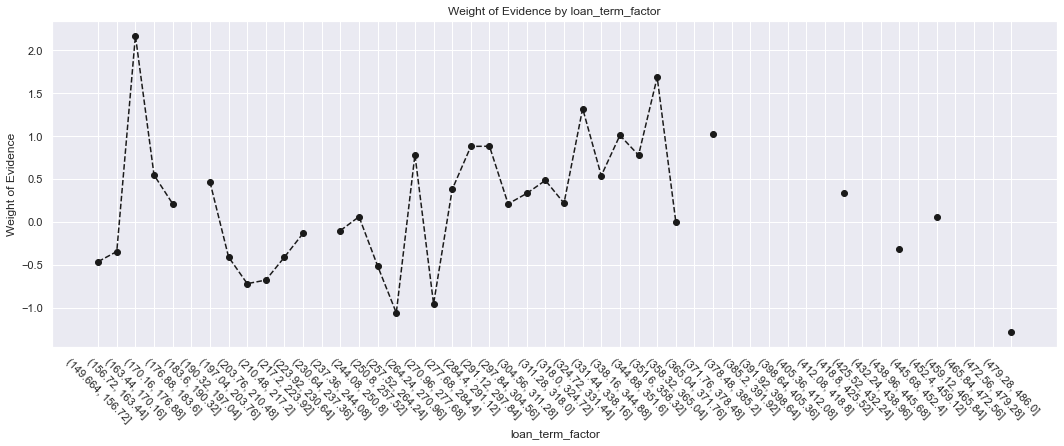

In [245]:
plot_by_woe(df_temp, -45)
# No clear association with this variable -> no need to create dummy variables

In [246]:
# prepayment_penalty_term
var_name = 'prepayment_penalty_term'
bin_num = 50
df_vars[f'{var_name}_factor'] = pd.cut(df_vars[var_name], bin_num)
df_temp = woe_ordered_continuous(df_vars, f'{var_name}_factor', df_targets)
df_temp
# directly linked to target

,prepayment_penalty_term_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(35.964, 35.965]",0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1,"(35.965, 35.967]",0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2,"(35.967, 35.968]",0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
3,"(35.968, 35.97]",0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
4,"(35.97, 35.971]",0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
5,"(35.971, 35.973]",0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
6,"(35.973, 35.974]",0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
7,"(35.974, 35.976]",0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
8,"(35.976, 35.977]",0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
9,"(35.977, 35.978]",0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [247]:
# intro_rate_period
var_name = 'intro_rate_period'
bin_num = 50
df_vars[f'{var_name}_factor'] = pd.cut(df_vars[var_name], bin_num)
df_temp = woe_ordered_continuous(df_vars, f'{var_name}_factor', df_targets)
df_temp
# directly linked to target

,intro_rate_period_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(2.997, 2.9971]",0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1,"(2.9971, 2.9972]",0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2,"(2.9972, 2.9974]",0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
3,"(2.9974, 2.9975]",0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
4,"(2.9975, 2.9976]",0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
5,"(2.9976, 2.9977]",0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
6,"(2.9977, 2.9978]",0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
7,"(2.9978, 2.998]",0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
8,"(2.998, 2.9981]",0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
9,"(2.9981, 2.9982]",0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [248]:
# property_value
var_name = 'property_value'
bin_num = 50
df_vars[f'{var_name}_factor'] = pd.cut(df_vars[var_name], bin_num)
df_temp = woe_ordered_continuous(df_vars, f'{var_name}_factor', df_targets)
df_temp

,property_value_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(4350.0, 18000.0]",61,0.213115,0.000406,13.0,48.0,0.000098,0.002724,-3.323886,NaN,NaN,0.100517
1,"(18000.0, 31000.0]",142,0.401408,0.000946,57.0,85.0,0.000430,0.004824,-2.417235,0.188294,0.906652,0.100517
2,"(31000.0, 44000.0]",238,0.575630,0.001585,137.0,101.0,0.001034,0.005732,-1.712774,0.174222,0.704460,0.100517
3,"(44000.0, 57000.0]",1075,0.714419,0.007160,768.0,307.0,0.005795,0.017422,-1.100693,0.138788,0.612082,0.100517
4,"(57000.0, 70000.0]",1027,0.773126,0.006840,794.0,233.0,0.005992,0.013223,-0.791590,0.058707,0.309103,0.100517
5,"(70000.0, 83000.0]",1422,0.824895,0.009471,1173.0,249.0,0.008852,0.014131,-0.467768,0.051769,0.323822,0.100517
6,"(83000.0, 96000.0]",3512,0.828303,0.023392,2909.0,603.0,0.021952,0.034221,-0.443987,0.003408,0.023781,0.100517
7,"(96000.0, 109000.0]",1779,0.825183,0.011849,1468.0,311.0,0.011078,0.017649,-0.465771,0.003120,0.021784,0.100517
8,"(109000.0, 122000.0]",2031,0.843919,0.013527,1714.0,317.0,0.012934,0.017990,-0.329951,0.018737,0.135820,0.100517
9,"(122000.0, 135000.0]",5435,0.856854,0.036200,4657.0,778.0,0.035142,0.044152,-0.228234,0.012934,0.101717,0.100517


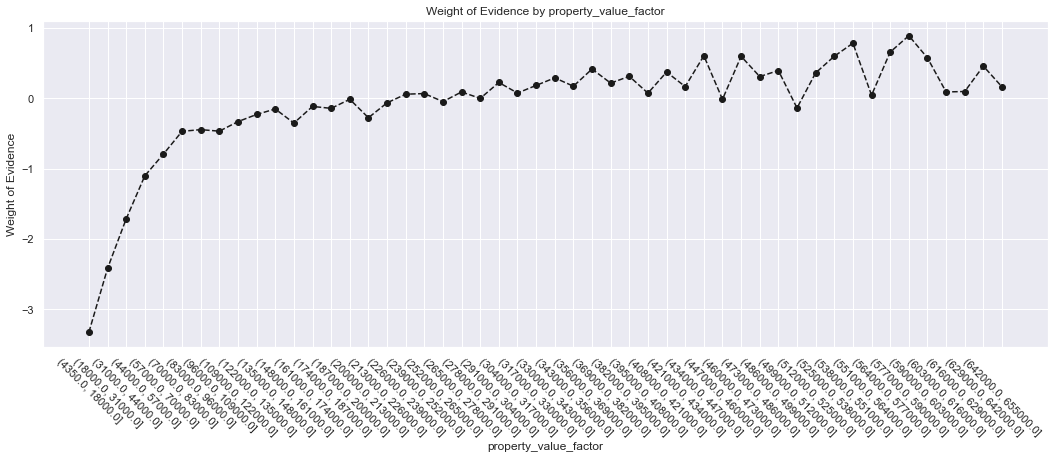

In [249]:
plot_by_woe(df_temp, -45)

In [250]:
df_vars[f'{var_name}:<57000'] = \
np.where((df_vars[var_name] <= 57000), 1, 0)

df_vars[f'{var_name}:57000-109000'] = \
np.where((df_vars[var_name] > 57000) & (df_vars[var_name] <= 109000), 1, 0)

df_vars[f'{var_name}:109000-213000'] = \
np.where((df_vars[var_name] > 109000) & (df_vars[var_name] <= 213000), 1, 0)

df_vars[f'{var_name}:213000-356000'] = \
np.where((df_vars[var_name] > 213000) & (df_vars[var_name] <= 356000), 1, 0)

df_vars[f'{var_name}:356000-408000'] = \
np.where((df_vars[var_name] > 356000) & (df_vars[var_name] <= 408000), 1, 0)

df_vars[f'{var_name}:408000-512000'] = \
np.where((df_vars[var_name] > 356000) & (df_vars[var_name] <= 512000), 1, 0)

df_vars[f'{var_name}:>512000'] = \
np.where((df_vars[var_name] > 512000), 1, 0)

In [251]:
# income
var_name = 'income'
bin_num = 50
df_vars[f'{var_name}_factor'] = pd.cut(df_vars[var_name], bin_num)
df_temp = woe_ordered_continuous(df_vars, f'{var_name}_factor', df_targets)
df_temp

G:\Anaconda\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
G:\Anaconda\lib\site-packages\pandas\core\algorithms.py:1977: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


,income_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-35.776, -29.98]",34,0.058824,0.000226,2.0,32.0,0.000015,0.001816,-4.790223,NaN,NaN,inf
1,"(-29.98, -24.46]",1,0.000000,0.000007,0.0,1.0,0.000000,0.000057,-inf,0.058824,inf,inf
2,"(-24.46, -18.94]",3,0.000000,0.000020,0.0,3.0,0.000000,0.000170,-inf,0.000000,NaN,inf
3,"(-18.94, -13.42]",1,0.000000,0.000007,0.0,1.0,0.000000,0.000057,-inf,0.000000,NaN,inf
4,"(-13.42, -7.9]",4,0.000000,0.000027,0.0,4.0,0.000000,0.000227,-inf,0.000000,NaN,inf
5,"(-7.9, -2.38]",3,0.000000,0.000020,0.0,3.0,0.000000,0.000170,-inf,0.000000,NaN,inf
6,"(-2.38, 3.14]",1748,0.739703,0.011642,1293.0,455.0,0.009757,0.025821,-0.973212,0.739703,inf,inf
7,"(3.14, 8.66]",77,0.194805,0.000513,15.0,62.0,0.000113,0.003519,-3.436719,0.544897,2.463507,inf
8,"(8.66, 14.18]",256,0.257812,0.001705,66.0,190.0,0.000498,0.010783,-3.075004,0.063007,0.361715,inf
9,"(14.18, 19.7]",490,0.471429,0.003264,231.0,259.0,0.001743,0.014698,-2.132045,0.213616,0.942959,inf


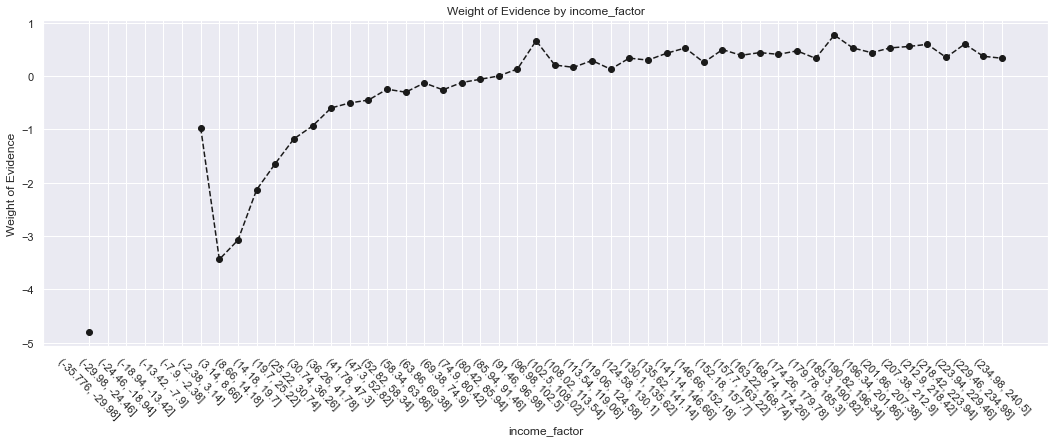

In [252]:
plot_by_woe(df_temp, -45)

In [253]:
df_vars[f'{var_name}:<13.5'] = \
np.where((df_vars[var_name] <= 13.5), 1, 0)

df_vars[f'{var_name}:13.5-30'] = \
np.where((df_vars[var_name] > 13.5) & (df_vars[var_name] <= 30), 1, 0)

df_vars[f'{var_name}:30-50'] = \
np.where((df_vars[var_name] > 30) & (df_vars[var_name] <= 50), 1, 0)

df_vars[f'{var_name}:50-75'] = \
np.where((df_vars[var_name] > 50) & (df_vars[var_name] <= 75), 1, 0)

df_vars[f'{var_name}:75-90'] = \
np.where((df_vars[var_name] > 75) & (df_vars[var_name] <= 90), 1, 0)

df_vars[f'{var_name}:90-125'] = \
np.where((df_vars[var_name] > 90) & (df_vars[var_name] <= 125), 1, 0)

df_vars[f'{var_name}:125-150'] = \
np.where((df_vars[var_name] > 125) & (df_vars[var_name] <= 150), 1, 0)

df_vars[f'{var_name}:150-200'] = \
np.where((df_vars[var_name] > 150) & (df_vars[var_name] <= 200), 1, 0)

df_vars[f'{var_name}:>200'] = \
np.where((df_vars[var_name] > 200), 1, 0)

In [254]:
# multifamily_affordable_units
var_name = 'multifamily_affordable_units'
bin_num = 50
df_vars[f'{var_name}_factor'] = pd.cut(df_vars[var_name], bin_num)
df_temp = woe_ordered_continuous(df_vars, f'{var_name}_factor', df_targets)
df_temp
# directly linked to target

,multifamily_affordable_units_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-0.001, -0.00096]",0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1,"(-0.00096, -0.00092]",0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2,"(-0.00092, -0.00088]",0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
3,"(-0.00088, -0.00084]",0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
4,"(-0.00084, -0.0008]",0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
5,"(-0.0008, -0.00076]",0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
6,"(-0.00076, -0.00072]",0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
7,"(-0.00072, -0.00068]",0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
8,"(-0.00068, -0.00064]",0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
9,"(-0.00064, -0.0006]",0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [255]:
# tract_population
var_name = 'tract_population'
bin_num = 50
df_vars[f'{var_name}_factor'] = pd.cut(df_vars[var_name], bin_num)
df_temp = woe_ordered_continuous(df_vars, f'{var_name}_factor', df_targets)
df_temp

,tract_population_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-10.271, 205.42]",604,0.596026,0.004023,360.0,244.0,0.002717,0.013847,-1.628699,NaN,NaN,inf
1,"(205.42, 410.84]",1,1.000000,0.000007,1.0,0.0,0.000008,0.000000,inf,0.403974,inf,inf
2,"(410.84, 616.26]",8,0.750000,0.000053,6.0,2.0,0.000045,0.000114,-0.919022,0.250000,inf,inf
3,"(616.26, 821.68]",56,0.875000,0.000373,49.0,7.0,0.000370,0.000397,-0.071725,0.125000,0.847298,inf
4,"(821.68, 1027.1]",56,0.803571,0.000373,45.0,11.0,0.000340,0.000624,-0.608867,0.071429,0.537143,inf
5,"(1027.1, 1232.52]",176,0.806818,0.001172,142.0,34.0,0.001072,0.001930,-0.588168,0.003247,0.020699,inf
6,"(1232.52, 1437.94]",591,0.856176,0.003936,506.0,85.0,0.003818,0.004824,-0.233749,0.049358,0.354419,inf
7,"(1437.94, 1643.36]",897,0.870680,0.005974,781.0,116.0,0.005893,0.006583,-0.110650,0.014504,0.123100,inf
8,"(1643.36, 1848.78]",1248,0.887019,0.008312,1107.0,141.0,0.008354,0.008002,0.043014,0.016339,0.153664,inf
9,"(1848.78, 2054.2]",1276,0.866771,0.008499,1106.0,170.0,0.008346,0.009648,-0.144928,0.020248,0.187942,inf


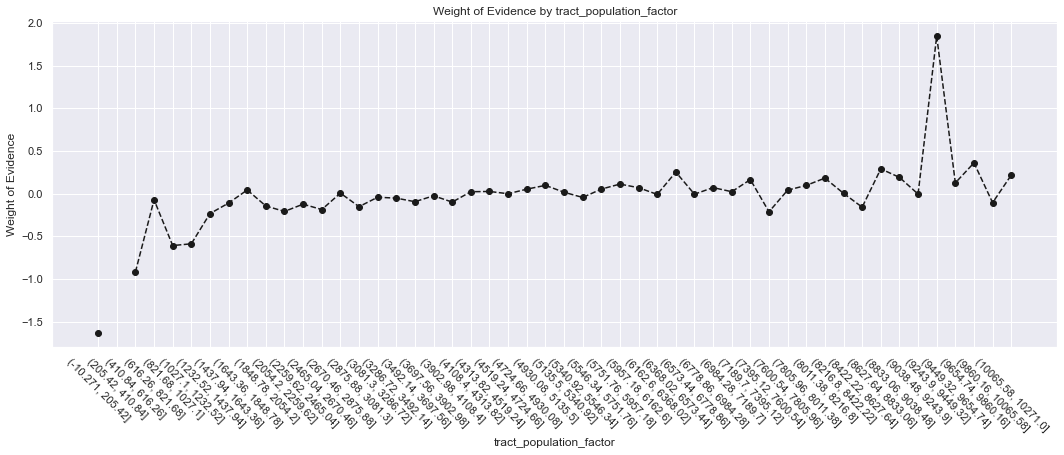

In [256]:
plot_by_woe(df_temp, -45)

In [257]:
df_vars[f'{var_name}:<1250'] = \
np.where((df_vars[var_name] <= 1250), 1, 0)

df_vars[f'{var_name}:1250-3000'] = \
np.where((df_vars[var_name] > 1250) & (df_vars[var_name] <= 3000), 1, 0)

df_vars[f'{var_name}:3000-4100'] = \
np.where((df_vars[var_name] > 3000) & (df_vars[var_name] <= 4100), 1, 0)

df_vars[f'{var_name}:4100-6700'] = \
np.where((df_vars[var_name] > 4100) & (df_vars[var_name] <= 6700), 1, 0)

df_vars[f'{var_name}:>6700'] = \
np.where((df_vars[var_name] > 200), 1, 0)

In [258]:
# tract_minority_population_percent
var_name = 'tract_minority_population_percent'
bin_num = 50
df_vars[f'{var_name}_factor'] = pd.cut(df_vars[var_name], bin_num)
df_temp = woe_ordered_continuous(df_vars, f'{var_name}_factor', df_targets)
df_temp

,tract_minority_population_percent_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-0.084, 1.68]",2126,0.781279,0.014160,1661.0,465.0,0.012534,0.026389,-0.744497,NaN,NaN,0.093109
1,"(1.68, 3.361]",4768,0.880453,0.031757,4198.0,570.0,0.031678,0.032348,-0.020908,0.099174,0.723589,0.093109
2,"(3.361, 5.041]",6425,0.885603,0.042793,5690.0,735.0,0.042937,0.041712,0.028960,0.005150,0.049868,0.093109
3,"(5.041, 6.722]",6844,0.904588,0.045584,6191.0,653.0,0.046718,0.037058,0.231640,0.018985,0.202680,0.093109
4,"(6.722, 8.402]",5911,0.903908,0.039370,5343.0,568.0,0.040319,0.032234,0.223786,0.000680,0.007854,0.093109
5,"(8.402, 10.083]",5880,0.914116,0.039163,5375.0,505.0,0.040560,0.028659,0.347321,0.010208,0.123534,0.093109
6,"(10.083, 11.763]",5369,0.906128,0.035760,4865.0,504.0,0.036712,0.028602,0.249611,0.007988,0.097710,0.093109
7,"(11.763, 13.444]",5370,0.905214,0.035767,4861.0,509.0,0.036682,0.028886,0.238917,0.000914,0.010694,0.093109
8,"(13.444, 15.124]",8340,0.910432,0.055548,7593.0,747.0,0.057297,0.042393,0.301282,0.005218,0.062365,0.093109
9,"(15.124, 16.805]",6165,0.899594,0.041062,5546.0,619.0,0.041851,0.035129,0.175092,0.010837,0.126190,0.093109


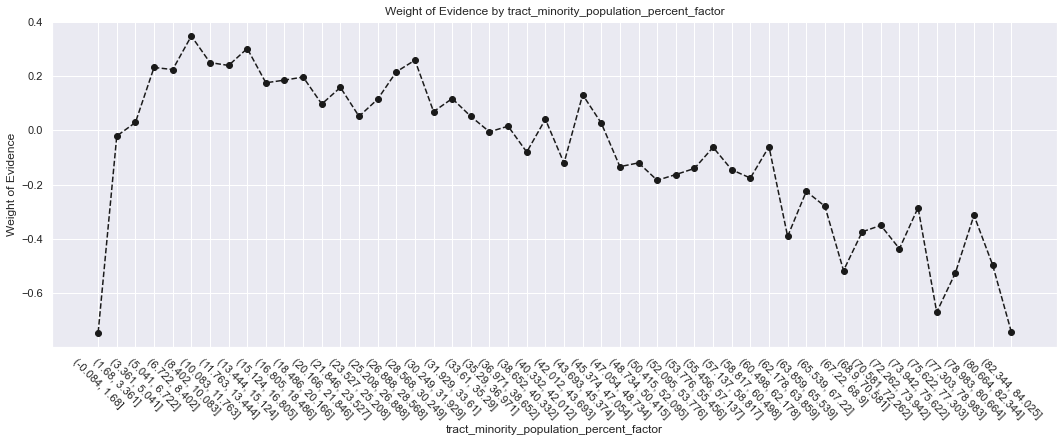

In [259]:
plot_by_woe(df_temp, -45)

In [260]:
df_vars[f'{var_name}:<16'] = \
np.where((df_vars[var_name] <= 16), 1, 0)

df_vars[f'{var_name}:16-30'] = \
np.where((df_vars[var_name] > 16) & (df_vars[var_name] <= 30), 1, 0)

df_vars[f'{var_name}:30-45'] = \
np.where((df_vars[var_name] > 30) & (df_vars[var_name] <= 45), 1, 0)

df_vars[f'{var_name}:45-65'] = \
np.where((df_vars[var_name] > 45) & (df_vars[var_name] <= 65), 1, 0)

df_vars[f'{var_name}:65-75'] = \
np.where((df_vars[var_name] > 65) & (df_vars[var_name] <= 75), 1, 0)

df_vars[f'{var_name}:>75'] = \
np.where((df_vars[var_name] > 75), 1, 0)

In [261]:
# ffiec_msa_md_median_family_income
var_name = 'ffiec_msa_md_median_family_income'
bin_num = 50
df_vars[f'{var_name}_factor'] = pd.cut(df_vars[var_name], bin_num)
df_temp = woe_ordered_continuous(df_vars, f'{var_name}_factor', df_targets)
df_temp
# directly linked to target

,ffiec_msa_md_median_family_income_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(84715.2, 84718.592]",0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1,"(84718.592, 84721.984]",0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2,"(84721.984, 84725.376]",0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
3,"(84725.376, 84728.768]",0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
4,"(84728.768, 84732.16]",0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
5,"(84732.16, 84735.552]",0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
6,"(84735.552, 84738.944]",0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
7,"(84738.944, 84742.336]",0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
8,"(84742.336, 84745.728]",0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
9,"(84745.728, 84749.12]",0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [262]:
# tract_to_msa_income_percentage
var_name = 'tract_to_msa_income_percentage'
bin_num = 50
df_vars[f'{var_name}_factor'] = pd.cut(df_vars[var_name], bin_num)
df_temp = woe_ordered_continuous(df_vars, f'{var_name}_factor', df_targets)
df_temp

,tract_to_msa_income_percentage_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(14.792, 19.16]",782,0.653453,0.005208,511.0,271.0,0.003856,0.015379,-1.383384,NaN,NaN,0.116694
1,"(19.16, 23.32]",87,0.873563,0.000579,76.0,11.0,0.000574,0.000624,-0.084797,0.220111,1.298587,0.116694
2,"(23.32, 27.48]",132,0.772727,0.000879,102.0,30.0,0.000770,0.001703,-0.793859,0.100836,0.709063,0.116694
3,"(27.48, 31.64]",295,0.762712,0.001965,225.0,70.0,0.001698,0.003973,-0.850029,0.010015,0.056170,0.116694
4,"(31.64, 35.8]",429,0.776224,0.002857,333.0,96.0,0.002513,0.005448,-0.773840,0.013512,0.076189,0.116694
5,"(35.8, 39.96]",544,0.713235,0.003623,388.0,156.0,0.002928,0.008853,-1.106485,0.062988,0.332645,0.116694
6,"(39.96, 44.12]",920,0.771739,0.006128,710.0,210.0,0.005358,0.011918,-0.799477,0.058504,0.307008,0.116694
7,"(44.12, 48.28]",913,0.771084,0.006081,704.0,209.0,0.005312,0.011861,-0.803191,0.000655,0.003713,0.116694
8,"(48.28, 52.44]",1495,0.810702,0.009957,1212.0,283.0,0.009146,0.016060,-0.563054,0.039618,0.240136,0.116694
9,"(52.44, 56.6]",1829,0.804265,0.012182,1471.0,358.0,0.011100,0.020317,-0.604470,0.006438,0.041416,0.116694


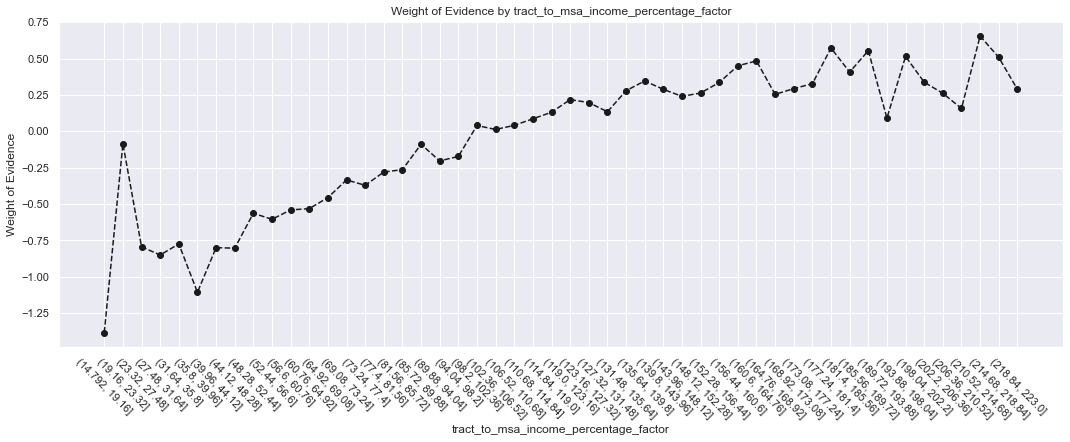

In [263]:
plot_by_woe(df_temp, -45)

In [264]:
df_vars[f'{var_name}:<45'] = \
np.where((df_vars[var_name] <= 45), 1, 0)

df_vars[f'{var_name}:45-60'] = \
np.where((df_vars[var_name] > 45) & (df_vars[var_name] <= 60), 1, 0)

df_vars[f'{var_name}:60-85'] = \
np.where((df_vars[var_name] > 60) & (df_vars[var_name] <= 85), 1, 0)

df_vars[f'{var_name}:85-100'] = \
np.where((df_vars[var_name] > 85) & (df_vars[var_name] <= 100), 1, 0)

df_vars[f'{var_name}:100-110'] = \
np.where((df_vars[var_name] > 100) & (df_vars[var_name] <= 110), 1, 0)

df_vars[f'{var_name}:110-120'] = \
np.where((df_vars[var_name] > 110) & (df_vars[var_name] <= 120), 1, 0)

df_vars[f'{var_name}:120-150'] = \
np.where((df_vars[var_name] > 120) & (df_vars[var_name] <= 150), 1, 0)

df_vars[f'{var_name}:>150'] = \
np.where((df_vars[var_name] > 150), 1, 0)

In [265]:
# tract_owner_occupied_units
var_name = 'tract_owner_occupied_units'
bin_num = 50
df_vars[f'{var_name}_factor'] = pd.cut(df_vars[var_name], bin_num)
df_temp = woe_ordered_continuous(df_vars, f'{var_name}_factor', df_targets)
df_temp

,tract_owner_occupied_units_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-3.066, 61.31]",674,0.620178,0.004489,418.0,256.0,0.003154,0.014528,-1.527331,NaN,NaN,0.04625
1,"(61.31, 122.62]",287,0.770035,0.001912,221.0,66.0,0.001668,0.003746,-0.809127,0.149857,0.718204,0.04625
2,"(122.62, 183.93]",684,0.809942,0.004556,554.0,130.0,0.004181,0.007378,-0.568004,0.039907,0.241122,0.04625
3,"(183.93, 245.24]",888,0.831081,0.005914,738.0,150.0,0.005569,0.008513,-0.424326,0.021140,0.143678,0.04625
4,"(245.24, 306.55]",1235,0.844534,0.008226,1043.0,192.0,0.007871,0.010896,-0.325274,0.013453,0.099053,0.04625
5,"(306.55, 367.86]",1490,0.875839,0.009924,1305.0,185.0,0.009848,0.010499,-0.064032,0.031305,0.261241,0.04625
6,"(367.86, 429.17]",1814,0.839581,0.012082,1523.0,291.0,0.011493,0.016514,-0.362521,0.036258,0.298488,0.04625
7,"(429.17, 490.48]",2490,0.854618,0.016585,2128.0,362.0,0.016058,0.020544,-0.246341,0.015037,0.116180,0.04625
8,"(490.48, 551.79]",2037,0.865488,0.013567,1763.0,274.0,0.013304,0.015550,-0.155991,0.010870,0.090350,0.04625
9,"(551.79, 613.1]",2479,0.862848,0.016511,2139.0,340.0,0.016141,0.019295,-0.178487,0.002641,0.022496,0.04625


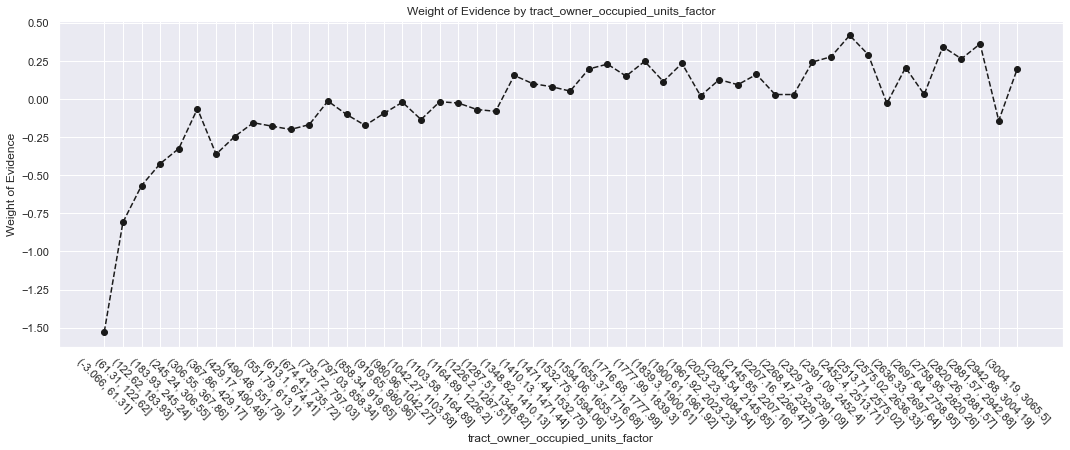

In [266]:
plot_by_woe(df_temp, -45)

In [267]:
df_vars[f'{var_name}:<120'] = \
np.where((df_vars[var_name] <= 120), 1, 0)

df_vars[f'{var_name}:120-250'] = \
np.where((df_vars[var_name] > 120) & (df_vars[var_name] <= 250), 1, 0)

df_vars[f'{var_name}:250-300'] = \
np.where((df_vars[var_name] > 250) & (df_vars[var_name] <= 300), 1, 0)

df_vars[f'{var_name}:300-1000'] = \
np.where((df_vars[var_name] > 300) & (df_vars[var_name] <= 1000), 1, 0)

df_vars[f'{var_name}:1000-1350'] = \
np.where((df_vars[var_name] > 1000) & (df_vars[var_name] <= 1350), 1, 0)

df_vars[f'{var_name}:1350-2300'] = \
np.where((df_vars[var_name] > 1350) & (df_vars[var_name] <= 2300), 1, 0)

df_vars[f'{var_name}:>2300'] = \
np.where((df_vars[var_name] > 2300), 1, 0)

In [268]:
# tract_one_to_four_family_homes
var_name = 'tract_one_to_four_family_homes'
bin_num = 50
df_vars[f'{var_name}_factor'] = pd.cut(df_vars[var_name], bin_num)
df_temp = woe_ordered_continuous(df_vars, f'{var_name}_factor', df_targets)
df_temp

,tract_one_to_four_family_homes_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-3.452, 69.04]",1144,0.715909,0.007620,819.0,325.0,0.006180,0.018444,-1.093376,NaN,NaN,0.026589
1,"(69.04, 138.08]",587,0.899489,0.003910,528.0,59.0,0.003984,0.003348,0.173924,0.183580,1.267300,0.026589
2,"(138.08, 207.12]",698,0.889685,0.004649,621.0,77.0,0.004686,0.004370,0.069891,0.009804,0.104033,0.026589
3,"(207.12, 276.16]",742,0.884097,0.004942,656.0,86.0,0.004950,0.004881,0.014179,0.005588,0.055712,0.026589
4,"(276.16, 345.2]",973,0.893114,0.006481,869.0,104.0,0.006558,0.005902,0.105318,0.009017,0.091139,0.026589
5,"(345.2, 414.24]",1272,0.880503,0.008472,1120.0,152.0,0.008452,0.008626,-0.020431,0.012611,0.125749,0.026589
6,"(414.24, 483.28]",999,0.886887,0.006654,886.0,113.0,0.006686,0.006413,0.041694,0.006384,0.062126,0.026589
7,"(483.28, 552.32]",1595,0.880251,0.010623,1404.0,191.0,0.010595,0.010839,-0.022828,0.006636,0.064522,0.026589
8,"(552.32, 621.36]",1712,0.876168,0.011403,1500.0,212.0,0.011319,0.012031,-0.061001,0.004083,0.038173,0.026589
9,"(621.36, 690.4]",1926,0.884735,0.012828,1704.0,222.0,0.012859,0.012599,0.020422,0.008567,0.081422,0.026589


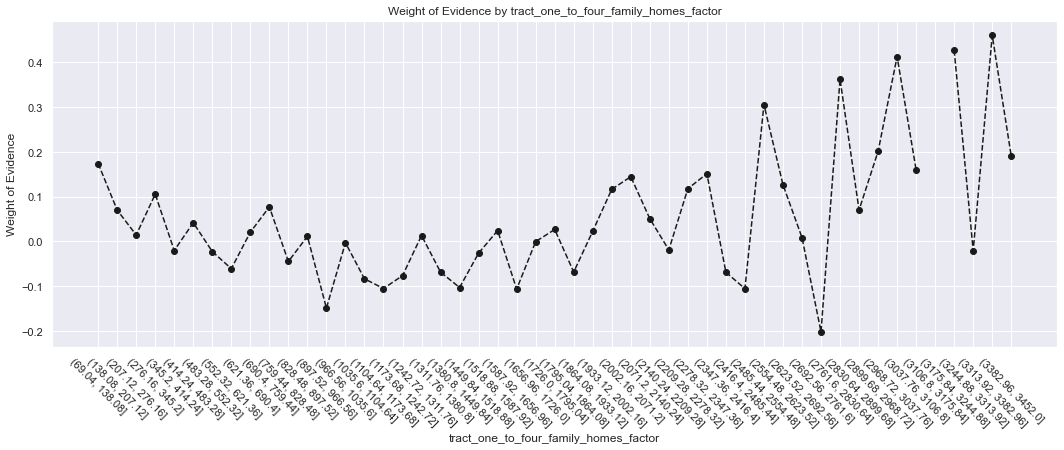

In [269]:
plot_by_woe(df_temp[1:], -45)
# No clear association with this variable -> no need to create dummy variables

In [270]:
# tract_median_age_of_housing_units
var_name = 'tract_median_age_of_housing_units'
bin_num = 50
df_vars[f'{var_name}_factor'] = pd.cut(df_vars[var_name], bin_num)
df_temp = woe_ordered_continuous(df_vars, f'{var_name}_factor', df_targets)
df_temp

,tract_median_age_of_housing_units_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-0.076, 1.52]",1297,0.753277,0.008639,977.0,320.0,0.007373,0.018160,-0.901469,NaN,NaN,0.034203
1,"(1.52, 3.04]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.034203
2,"(3.04, 4.56]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.034203
3,"(4.56, 6.08]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.034203
4,"(6.08, 7.6]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.034203
5,"(7.6, 9.12]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.034203
6,"(9.12, 10.64]",8,0.750000,0.000053,6.0,2.0,0.000045,0.000114,-0.919022,NaN,NaN,0.034203
7,"(10.64, 12.16]",5024,0.911425,0.033462,4579.0,445.0,0.034554,0.025254,0.313527,0.161425,1.232549,0.034203
8,"(12.16, 13.68]",3412,0.899766,0.022725,3070.0,342.0,0.023166,0.019409,0.176987,0.011660,0.136540,0.034203
9,"(13.68, 15.2]",3334,0.906119,0.022206,3021.0,313.0,0.022797,0.017763,0.249505,0.006353,0.072518,0.034203


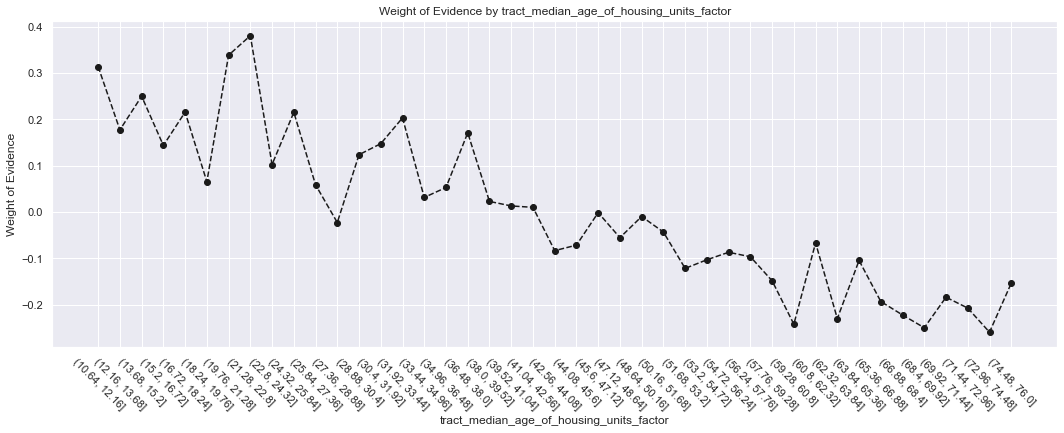

In [271]:
plot_by_woe(df_temp[7:], -45)

In [272]:
df_vars[f'{var_name}:<25'] = \
np.where((df_vars[var_name] <= 25), 1, 0)

df_vars[f'{var_name}:25-40'] = \
np.where((df_vars[var_name] > 25) & (df_vars[var_name] <= 40), 1, 0)

df_vars[f'{var_name}:40-50'] = \
np.where((df_vars[var_name] > 40) & (df_vars[var_name] <= 50), 1, 0)

df_vars[f'{var_name}:50-65'] = \
np.where((df_vars[var_name] > 50) & (df_vars[var_name] <= 65), 1, 0)

df_vars[f'{var_name}:>65'] = \
np.where((df_vars[var_name] > 65), 1, 0)

In [273]:
# Assign dataset
# df_data_inputs_train = df_vars
df_data_inputs_test = df_vars

In [274]:
# Save dataset
df_data_inputs_train.to_csv('df_data_inputs_train.csv')
df_data_targets_train.to_csv('df_data_targets_train.csv')
df_data_inputs_test.to_csv('df_data_inputs_test.csv')
df_data_targets_test.to_csv('df_data_targets_test.csv')